<a href="https://colab.research.google.com/github/njonge-nathan/Capstone-Data-Mining-the-Water-Table.ipynb/blob/main/Capstone_Notebook_Data_Mining_the_Water_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining the Water Table**

# **1.0 Defining the Question**

## a) Specifying the Question

The main objective of this project is to predict the operating condition of a waterpoint (functional, non-functional and functional needs repair)  for each record in the dataset based on a number of variables about what kind of pump is operating, when it was installed and how it is managed.

## b) Defining the metric of success

To successfully predict the operating condition of a waterpoint (functional, non-functional and functional needs repair)  for each record in the dataset.

## c) Understanding the context

Using data from Taarifa[http://taarifa.org/] and the Tanzanian Ministry of Water[http://maji.go.tz/], can you predict which pumps are functional, which need some repairs, and which don't work at all? Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities.

## d) Recording the Experimental Design

* Importing the relevant libraries that we will use in our analysis
* Reading and exploring the dataset we will use for our project
* Defining the appropriateness of the available data with regards to the project
* Finding and dealing with outliers, anomalies, and missing data within the dataset.
* Performing univariate, bivariate, and multivariate analysis while recording our observations.
* Implementing the solution by using the various classifier algorithms to predict whether a waterpoint is functional,non functional or functional but needs repair based on the information provided.
* Challenging the solution by using a model that could outperform the best performing model identified earlier.
* Providing conclusions and recommendations based on the analysis  and various modelling techniques used in the project.

## e) Data Relevance

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private - The number of private wells an aquifer can provide water to.
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint
 
> Labels
Distribution of Labels
The labels in this dataset are simple. There are three possible values:
* functional - the waterpoint is operational and there are no repairs needed
* functional needs repair - the waterpoint is operational, but needs repairs
* non functional - the waterpoint is not operational


# **2.0 Importing Libraries**

In [129]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# **3.0 Loading the data**

In [130]:
# importing the train values dataset
train = pd.read_csv("/content/Training set values.csv")

# importing the train labels
labels = pd.read_csv("/content/Training set labels.csv")

# **4.0 Checking the dataset**

**Train dataset**

In [131]:
# previewing the first five rows
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [132]:
# previewing the last five rows
train.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,Wami / Ruvu,Kikatanyemba,Morogoro,5,2,Morogoro Rural,Ngerengere,150,True,GeoData Consultants Ltd,VWC,NaN,True,2002,nira/tanira,nira/tanira,handpump,vwc,user-group,pay when scheme fails,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


**Train labels dataset**

In [133]:
# previewing the first five rows 
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [134]:
# previewing the last five rows
labels.tail()

,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


**Creating a new dataset by merging the train and labels dataset**

In [135]:
# merge the train values with the train labels
train_final = train.merge(labels , on='id')
train_final.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


 **Checking the dimensions**

In [136]:
# check the dimensions
print(f"Our dataset has {train_final.shape} rows and columns")

Our dataset has (59400, 41) rows and columns


**Checking the datatypes of our dataset**

In [137]:
# check the datatypes 
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

**Summary Statistics**

In [138]:
# check summary statistics
train_final.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


**Unique values**

In [139]:
# check for unique values
categorical_variables = [ 'funder', 
       'installer',  'wpt_name', 
       'basin', 'subvillage', 'region',  'lga',
       'ward',  'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group']
for column in categorical_variables:
  print(column)
  print(train_final[column].nunique())
  print(train_final[column].unique())
  print('\n')

funder
1897
['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']


installer
2145
['Roman' 'GRUMETI' 'World vision' ... 'Dina' 'brown' 'SELEPTA']


wpt_name
37400
['none' 'Zahanati' 'Kwa Mahundi' ... 'Kwa Yahona Kuvala' 'Mshoro'
 'Kwa Mzee Lugawa']


basin
9
['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']


subvillage
19287
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']


region
21
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']


lga
125
['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamo

# **5.0 Tidying the Dataset**

## a) **Validity**

In [140]:
# drop scheme_name column
train_final.drop(["scheme_name"], axis=1, inplace=True)

In [141]:
# confirming the column has been dropped
train_final.head(0)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


## **b) Completeness**

In [142]:
# check for percentage of null values in each column
(train_final.isna().sum()/train_final.shape[0])*100

id                       0.000000
amount_tsh               0.000000
date_recorded            0.000000
funder                   6.119529
gps_height               0.000000
installer                6.153199
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000000
num_private              0.000000
basin                    0.000000
subvillage               0.624579
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           5.612795
recorded_by              0.000000
scheme_management        6.526936
permit                   5.144781
construction_year        0.000000
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_group         0.000000
payment                  0.000000
payment_type  

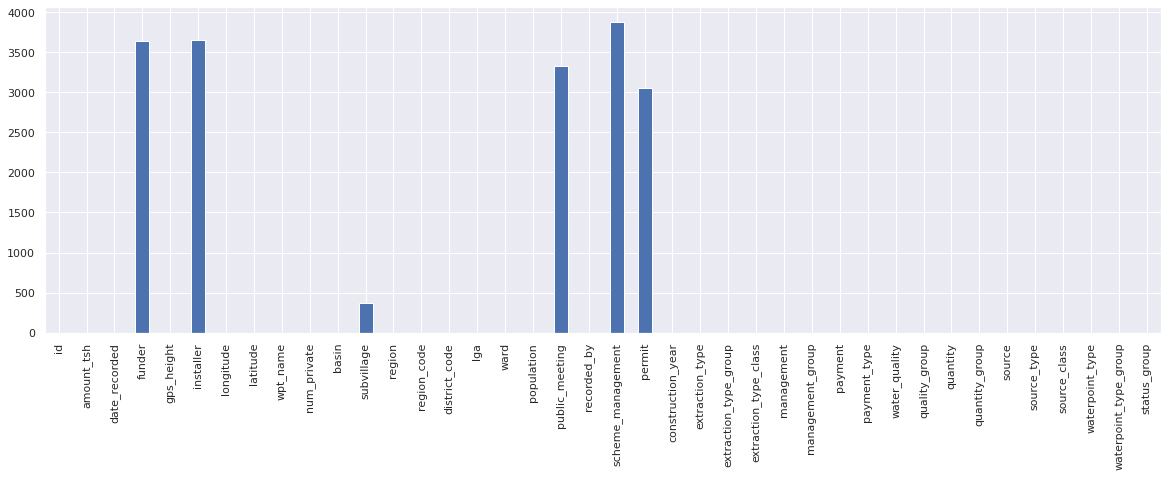

In [143]:
# visualizing our null values
train_final.isna().sum().plot(kind="bar",figsize=(20,6))
plt.show()

In [144]:
# drop rows with null values
train_final = train_final.dropna()
# confirming that the missing values have been dropped
train_final.isna().sum().sum()

0

## **c) Consistency**

In [145]:
# checking if our dataset has any duplicated values
train_final.duplicated().value_counts()

False    48288
dtype: int64

There were no duplicates in our dataset

## **d) Uniformity**

In [146]:
# checking our columns for uniformity
train_final.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [147]:
# changing the column names 
train_final = train_final.rename(columns = {"amount_tsh":"amount_water_available","num_private":"no_privatewells_aquifer","lga":"local_gvt_auth","gps_height":"altitude_of_well"})
# confirming that the columns names have changed
train_final.columns

Index(['id', 'amount_water_available', 'date_recorded', 'funder',
       'altitude_of_well', 'installer', 'longitude', 'latitude', 'wpt_name',
       'no_privatewells_aquifer', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'local_gvt_auth', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [148]:
# converting date from object to date time datatype
train_final['date_recorded'] = train_final['date_recorded'].apply(pd.to_datetime)

In [149]:
# confirming dtypes has been changed
train_final['date_recorded'].dtypes

dtype('<M8[ns]')

In [150]:
# convert category columns to category datatype
for col in ['funder', 'installer',  'wpt_name', 'basin', 'subvillage', 'region',  'local_gvt_auth', 'ward',
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']:

    train_final[col] = train_final[col].astype('category')

In [151]:
# confirming dtypes has been changed
train_final[['funder', 'installer',  'wpt_name', 'basin', 'subvillage', 'region',  'local_gvt_auth', 'ward',
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']].dtypes

funder                   category
installer                category
wpt_name                 category
basin                    category
subvillage               category
region                   category
local_gvt_auth           category
ward                     category
public_meeting           category
recorded_by              category
scheme_management        category
permit                   category
extraction_type          category
extraction_type_group    category
extraction_type_class    category
management               category
management_group         category
payment                  category
payment_type             category
water_quality            category
quality_group            category
quantity                 category
quantity_group           category
source                   category
source_type              category
source_class             category
waterpoint_type          category
waterpoint_type_group    category
status_group             category
dtype: object

In [152]:
# create a new feature 'age' relative to the max construction year
train_final['age'] = train_final['construction_year'].apply(lambda x: (2013 - x) if x != 0 else 0 )

# review relation with recorded date
train_final[['age', 'construction_year', 'date_recorded']].drop_duplicates()

# There are many age values, will group them for better analysis
def get_age_group(x):
    if x <= 17:
        return 'new'
    elif x > 17 and x <=34:
        return 'middle'
    else:
        return 'old'

# Create new feature waterpoint_age_group
train_final['waterpoint_age_group'] = train_final['age'].apply(get_age_group)


In [153]:
funders = train_final['funder'].value_counts()

condition = funders<456  
other_funders = funders[condition].index
mask_dict = dict.fromkeys(other_funders, 'others')

train_final['funder'] = train_final['funder'].replace(mask_dict)  

In [154]:
train_final.funder.unique()

array(['others', 'Unicef', 'Dwsp', 'Danida', 'World Vision',
       'Government Of Tanzania', 'Water', 'Private Individual',
       'District Council', 'Norad', 'Dwe', 'Rwssp', 'Hesawa', 'Tcrs',
       'Germany Republi', 'Netherlands', 'Kkkt', 'Tasaf', 'World Bank',
       'Ministry Of Water', 'Dhv'], dtype=object)

In [155]:
installers = train_final['installer'].value_counts()

condition = installers<345  
other_installers = installers[condition].index
mask_dict = dict.fromkeys(other_installers, 'others')

train_final['installer'] = train_final['installer'].replace(mask_dict)  

In [156]:
train_final.installer.unique()

array(['others', 'World vision', 'DWE', 'DANIDA', 'WEDECO',
       'District council', 'Central government', 'Commu', 'LGA',
       'Government', 'RWE', 'Community', 'CES', 'HESAWA', 'KKKT', 'TASAF',
       'DANID', 'TCRS', 'District Council', 'Hesawa', 'Gover'],
      dtype=object)

In [157]:
subvillages = train_final['subvillage'].value_counts()

condition = subvillages<87 
other_subvillages = subvillages[condition].index
mask_dict = dict.fromkeys(other_subvillages, 'others')

train_final['subvillage'] = train_final['subvillage'].replace(mask_dict)  

In [158]:
train_final.subvillage.unique()

array(['others', 'Majengo', 'Shuleni', 'Sokoni', 'Mbuyuni', 'Kati', 'I',
       'Mjini', 'Mtakuja', 'Songambele', 'Madukani', 'Miembeni', 'Mwenge',
       'M', 'Msikitini', 'Muungano', 'Kanisani', 'Mjimwema', 'Mlimani',
       '1', 'Mkwajuni'], dtype=object)

In [159]:
local_government = train_final['local_gvt_auth'].value_counts()

condition = local_government<667 
other_lgs = local_government[condition].index
mask_dict = dict.fromkeys(other_lgs, 'others')

train_final['local_gvt_auth'] = train_final['local_gvt_auth'].replace(mask_dict)  

In [160]:
train_final.local_gvt_auth.unique()

array(['others', 'Namtumbo', 'Maswa', 'Njombe', 'Same', 'Kigoma Rural',
       'Moshi Rural', 'Bagamoyo', 'Kyela', 'Kibondo', 'Arusha Rural',
       'Lushoto', 'Meru', 'Kasulu', 'Iringa Rural', 'Songea Rural',
       'Mvomero', 'Mbozi', 'Bariadi', 'Kilosa', 'Ngara', 'Mpanda'],
      dtype=object)

In [161]:
wards = train_final['ward'].value_counts()

condition = wards<132 
other_wards = wards[condition].index
mask_dict = dict.fromkeys(other_wards, 'others')

train_final['ward'] = train_final['ward'].replace(mask_dict)  

In [162]:
train_final.ward.unique()

array(['others', 'Msindo', 'Mdandu', 'Usuka', 'Matola', 'Siha Kati',
       'Chalinze', 'Mtwango', 'Nduruma', 'Kikatiti', 'Imalinyi',
       'Maji ya Chai', "Wanging'ombe", 'Ngarenanyuki', 'Mishamo',
       'Olkokola', 'Vikindu', 'Zinga/Ikerege', 'Magomeni', 'Maramba',
       'Igosi'], dtype=object)

In [163]:
water_point = train_final['wpt_name'].value_counts()

condition = water_point<132 
other_waterpoints = water_point[condition].index
mask_dict = dict.fromkeys(other_waterpoints, 'others')

train_final['wpt_name'] = train_final['wpt_name'].replace(mask_dict)  

In [164]:
train_final.wpt_name.unique()

array(['none', 'others', 'Shuleni', 'Zahanati', 'Ofisini', 'Msikitini',
       'Bombani', 'Kanisani', 'Shule', 'Sokoni', 'Shule Ya Msingi'],
      dtype=object)

In [165]:
# convert category columns to category datatype
for col in ['funder','installer','subvillage','local_gvt_auth','ward','wpt_name','waterpoint_age_group']:

    train_final[col] = train_final[col].astype('category')

In [166]:
train_final.dtypes

id                                  int64
amount_water_available            float64
date_recorded              datetime64[ns]
funder                           category
altitude_of_well                    int64
installer                        category
longitude                         float64
latitude                          float64
wpt_name                         category
no_privatewells_aquifer             int64
basin                            category
subvillage                       category
region                           category
region_code                         int64
district_code                       int64
local_gvt_auth                   category
ward                             category
population                          int64
public_meeting                   category
recorded_by                      category
scheme_management                category
permit                           category
construction_year                   int64
extraction_type                  c

## e) Accuracy

In [167]:
# checking if the amount of water availabe at a waterpoint is less than 0
(train_final[['amount_water_available','population','district_code','region_code','no_privatewells_aquifer']] < 0).sum()

amount_water_available     0
population                 0
district_code              0
region_code                0
no_privatewells_aquifer    0
dtype: int64

There were no values that were less than 0 

In [168]:
train_final[train_final['construction_year'] == 0]

,id,amount_water_available,date_recorded,funder,altitude_of_well,installer,longitude,latitude,wpt_name,no_privatewells_aquifer,basin,subvillage,region,region_code,district_code,local_gvt_auth,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age,waterpoint_age_group
6,19816,0.0,2012-10-01,Dwsp,0,others,33.362410,-3.766365,others,0,Internal,others,Shinyanga,17,3,others,others,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0,new
8,53934,0.0,2012-11-03,others,0,others,32.711100,-5.146712,others,0,Lake Tanganyika,others,Tabora,14,6,others,others,0,True,GeoData Consultants Ltd,VWC,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0,new
12,36957,0.0,2012-10-14,World Vision,0,World vision,33.798106,-3.290194,others,0,Internal,others,Shinyanga,17,2,Maswa,others,0,True,GeoData Consultants Ltd,WUG,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0,new
14,53752,0.0,2012-10-20,others,0,WEDECO,34.364073,-3.629333,others,0,Internal,others,Shinyanga,17,6,others,others,0,True,GeoData Consultants Ltd,WUG,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0,new
30,46804,0.0,2011-03-23,Water,0,others,36.108312,-5.791000,others,0,Wami / Ruvu,others,Dodoma,1,4,others,others,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59379,58255,0.0,2011-07-13,others,0,others,31.613284,-1.820226,others,0,Lake Victoria,others,Kagera,18,3,others,others,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0,new
59384,72148,0.0,2011-07-10,others,0,others,30.667805,-2.483710,others,0,Lake Victoria,Songambele,Kagera,18,30,Ngara,others,0,True,GeoData Consultants Ltd,VWC,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0,new
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,others,0,Lake Rukwa,others,Mbeya,12,1,others,others,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0,new
59393,48348,0.0,2012-10-27,others,0,others,33.866852,-4.287410,others,0,Internal,others,Tabora,14,2,others,others,0,False,GeoData Consultants Ltd,Water authority,False,0,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional,0,new


## e) **Check for outliers**

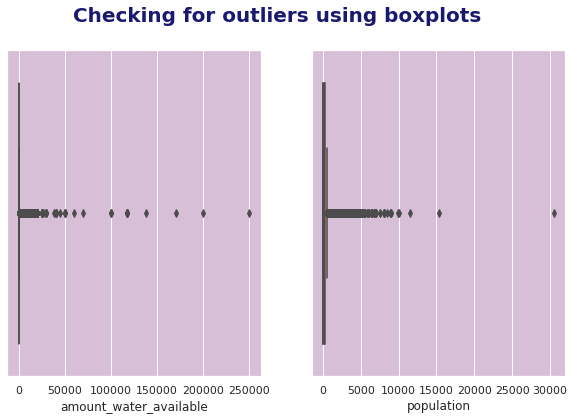

In [169]:
# checking for outliers in numerical columns
numerical_cols = train_final[['amount_water_available','population']]

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.suptitle('Checking for outliers using boxplots',fontsize=20,weight='bold',color='midnightblue')
for ax, data, column in zip(axes.flatten(),train_final,numerical_cols):
  sns.boxplot(train_final[column],ax=ax,palette='Set1')
  ax.set_facecolor('thistle')

We will not drop the outliers

### **Exporting the cleaned dataset**

In [170]:
train_final.to_csv("clean_water.csv")

# **6.0 Exploratory Data Analysis**

## **a) Univariate Analysis**

### **1. Histograms**

In [171]:
train_final.head(3)

,id,amount_water_available,date_recorded,funder,altitude_of_well,installer,longitude,latitude,wpt_name,no_privatewells_aquifer,basin,subvillage,region,region_code,district_code,local_gvt_auth,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age,waterpoint_age_group
0,69572,6000.0,2011-03-14,others,1390,others,34.938093,-9.856322,none,0,Lake Nyasa,others,Iringa,11,5,others,others,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14,new
2,34310,25.0,2013-02-25,others,686,World vision,37.460664,-3.821329,others,0,Pangani,Majengo,Manyara,21,4,others,others,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,4,new
3,67743,0.0,2013-01-28,Unicef,263,others,38.486161,-11.155298,others,0,Ruvuma / Southern Coast,others,Mtwara,90,63,others,others,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,27,middle


Histogram of Altitude of well

Text(0.5, 1.0, 'Histogram')

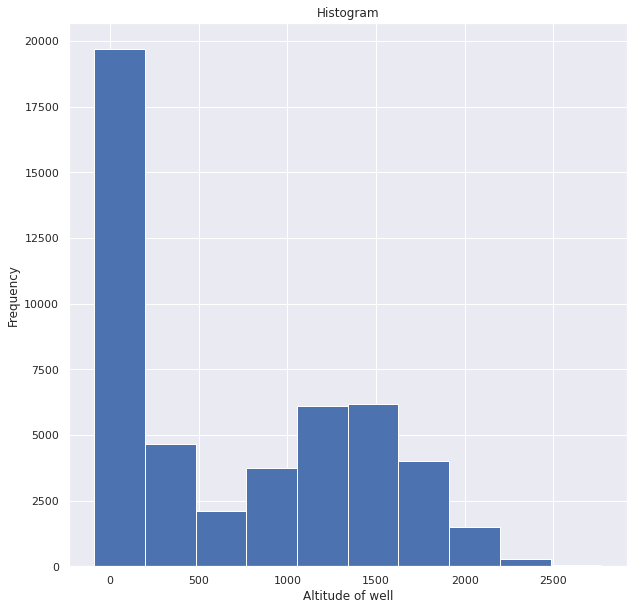

In [172]:
# Histogram of Altitude of well
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Altitude of well',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['altitude_of_well'].plot.hist().set_title('Histogram')

Text(0.5, 1.0, 'Histogram')

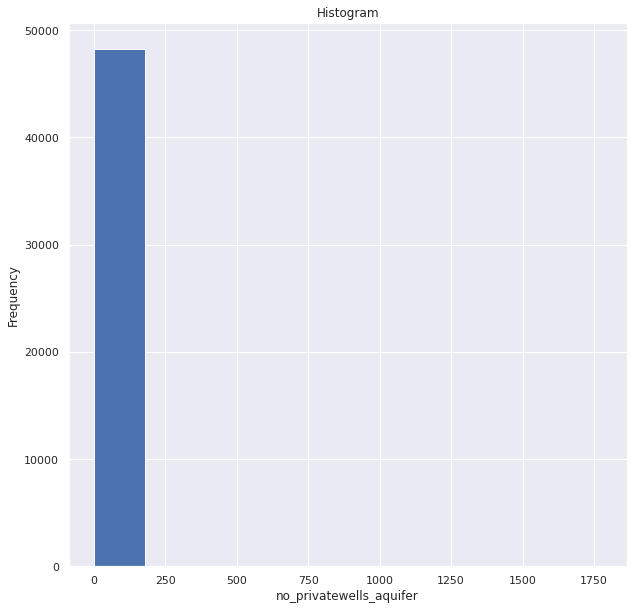

In [173]:
# Histogram of number privatewells aquifer
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('no_privatewells_aquifer',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['no_privatewells_aquifer'].plot.hist().set_title('Histogram')

Histogram of Amount of water available

Text(0.5, 1.0, 'Histogram')

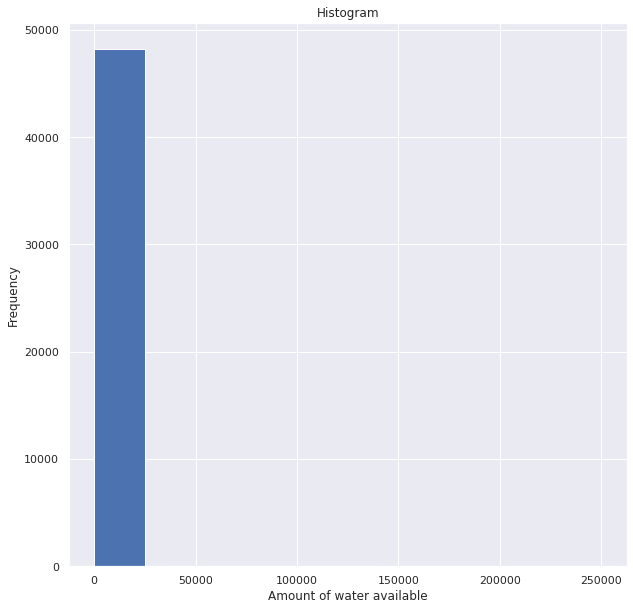

In [174]:
# Histogram of amount water available
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Amount of water available',fontsize=(12))
plt.ylabel('',fontsize=(12))
train_final['amount_water_available'].plot.hist().set_title('Histogram')

Histogram of Population

Text(0.5, 1.0, 'Histogram')

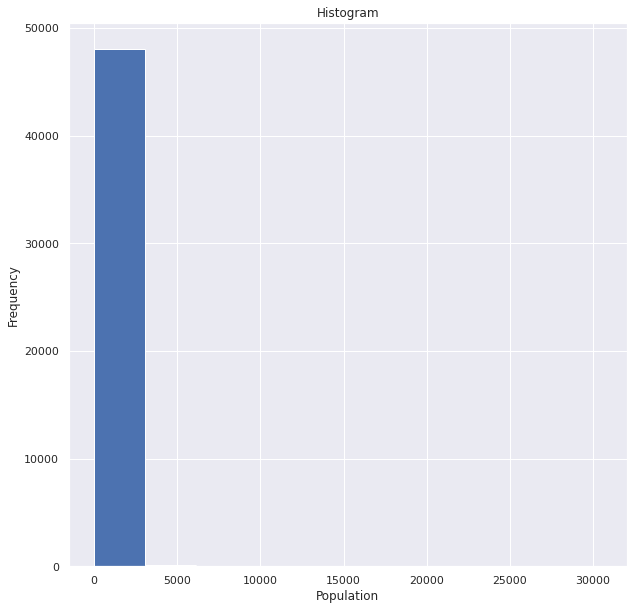

In [175]:
# Histogram of population
plt.figure(figsize=(10,10))
sns.set_theme(style='darkgrid')
plt.xlabel('Population',fontsize=(12))
plt.ylabel('Number of people',fontsize=(12))
train_final['population'].plot.hist().set_title('Histogram')

### **2. Countplot/Barplot**

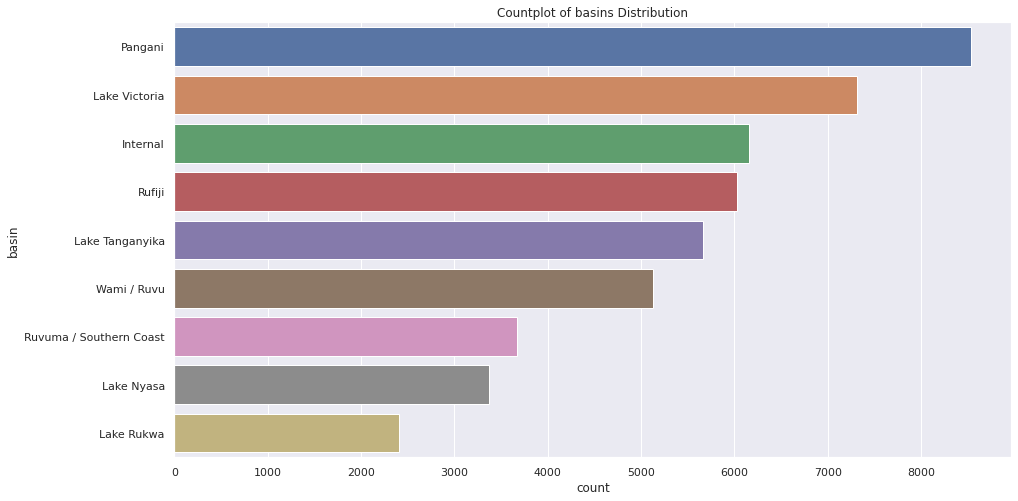

In [176]:
# countplot of basin distributions
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(y='basin',
              data=train_final,
              order=train_final['basin'].value_counts().index).set_title("Countplot of basins Distribution")
plt.show()


**From our countplot of basins Lake Rukwa had the least count of 2402 while Pangani had the highest count with 8540.**

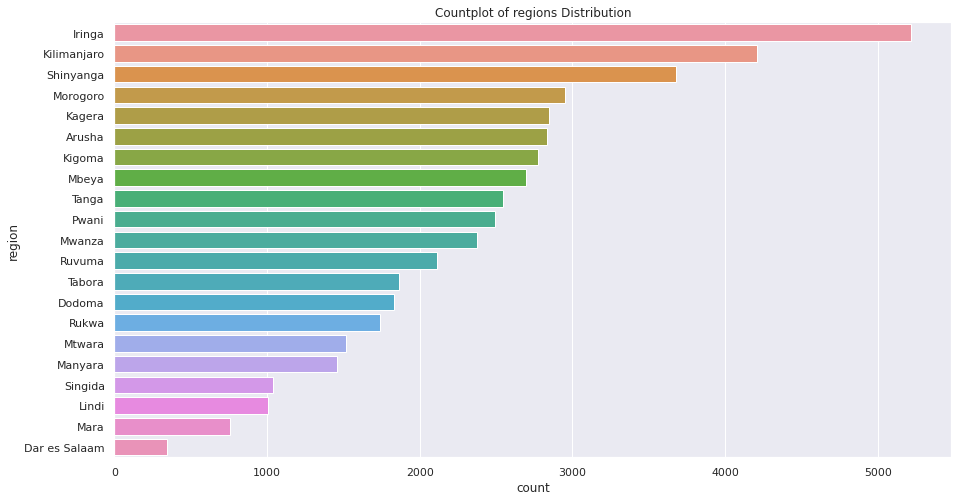

In [177]:
# countplot of region distributions
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(y='region',
              data=train_final,
              order=train_final['region'].value_counts().index).set_title("Countplot of regions Distribution")
plt.show()

From our countplot of regions Iringa had a higher count with 5220 while Dar es Salaam had the least count with 344

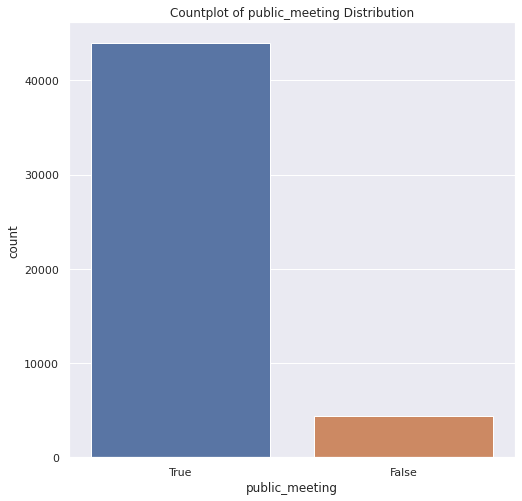

In [178]:
# countplot of public_meeting distributions
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x='public_meeting',
              data=train_final,
              order=train_final['public_meeting'].value_counts().index).set_title("Countplot of public_meeting Distribution")
plt.show()

From our count plot majority of the records had public meetings

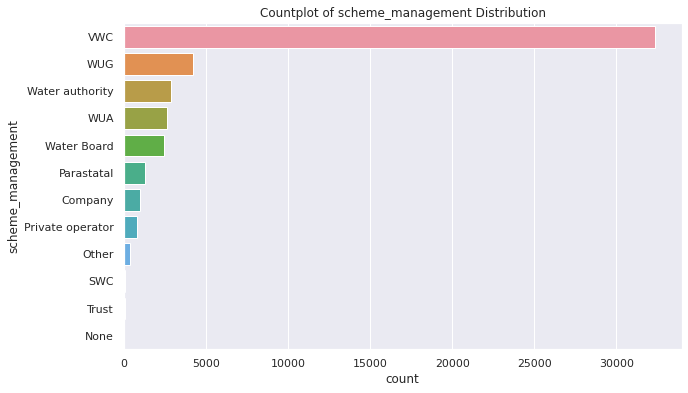

In [179]:
# countplot of scheme_management distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='scheme_management',
              data=train_final,
              order=train_final['scheme_management'].value_counts().index).set_title("Countplot of scheme_management Distribution")
plt.show()

VWC had the highest count with more than 30,000 

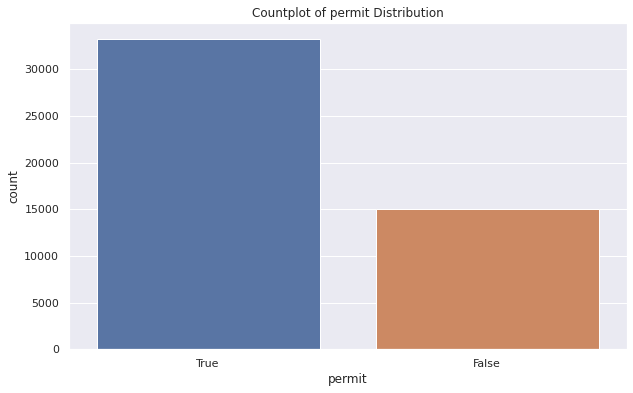

In [180]:
# countplot of permit distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='permit',
              data=train_final,
              order=train_final['permit'].value_counts().index).set_title("Countplot of permit Distribution")
plt.show()

From the above plot majority of the waterpoints had permits

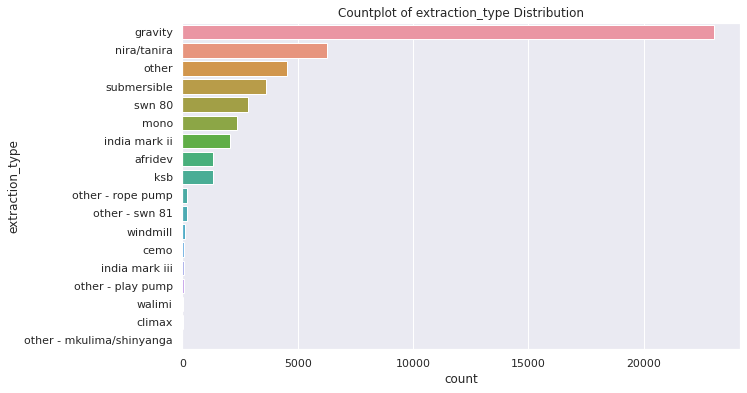

In [181]:
# countplot of extraction_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='extraction_type',
              data=train_final,
              order=train_final['extraction_type'].value_counts().index).set_title("Countplot of extraction_type Distribution")
plt.show()

From the above plot majority of the waterpoints extraction type was gravity.

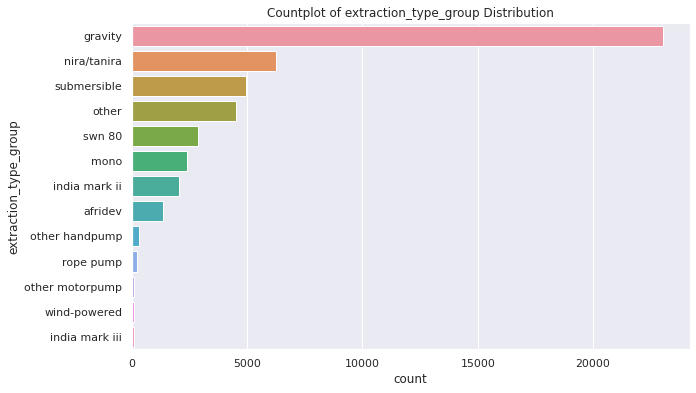

In [182]:
# countplot of extraction_type_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='extraction_type_group',
              data=train_final,
              order=train_final['extraction_type_group'].value_counts().index).set_title("Countplot of extraction_type_group Distribution")
plt.show()

From the above plot majority of the waterpoints extraction type group was gravity.

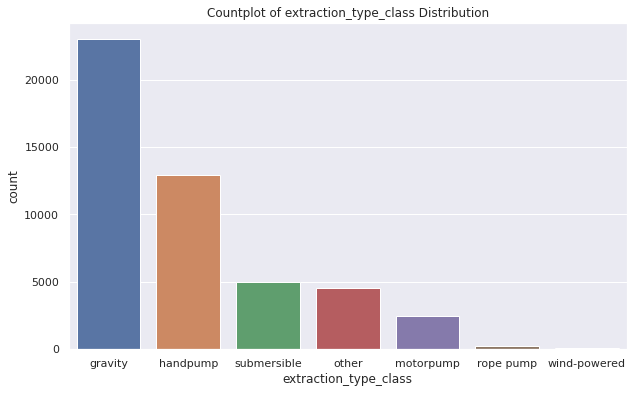

In [183]:
# countplot of extraction_type_class distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='extraction_type_class',
              data=train_final,
              order=train_final['extraction_type_class'].value_counts().index).set_title("Countplot of extraction_type_class Distribution")
plt.show()

From the above plot majority of the waterpoints extraction type class was gravity this could be because Tanzania exhibits a mountainous terrain

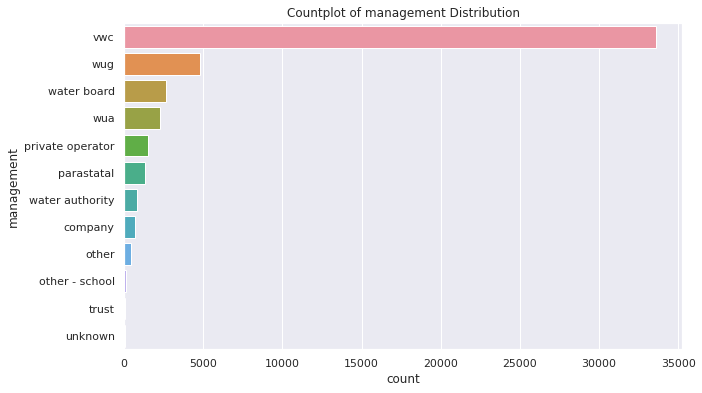

In [184]:
# countplot of management distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='management',
              data=train_final,
              order=train_final['management'].value_counts().index).set_title("Countplot of management Distribution")
plt.show()

From our countplot village water committee managed majority of the waterpoints

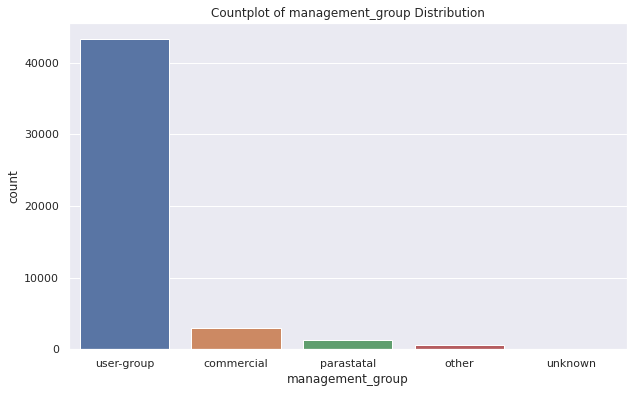

In [185]:
# countplot of management_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='management_group',
              data=train_final,
              order=train_final['management_group'].value_counts().index).set_title("Countplot of management_group Distribution")
plt.show()

From our plot above on the management group user group had a higher count

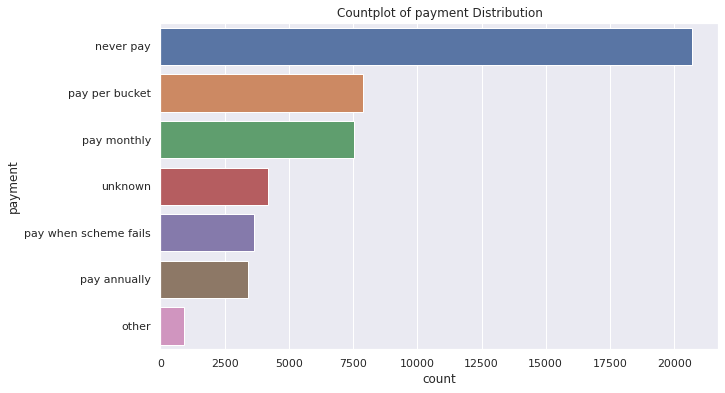

In [186]:
# countplot of payment distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='payment',
              data=train_final,
              order=train_final['payment'].value_counts().index).set_title("Countplot of payment Distribution")
plt.show()

From our plot above on payment never pay was the most common  

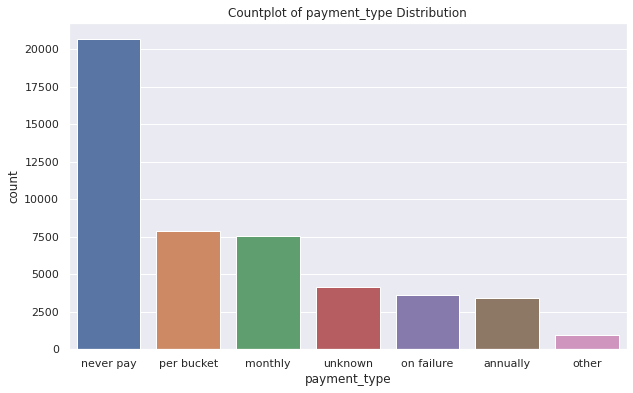

In [187]:
# countplot of payment_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='payment_type',
              data=train_final,
              order=train_final['payment_type'].value_counts().index).set_title("Countplot of payment_type Distribution")
plt.show()

From our plot above on payment type never pay was the most common

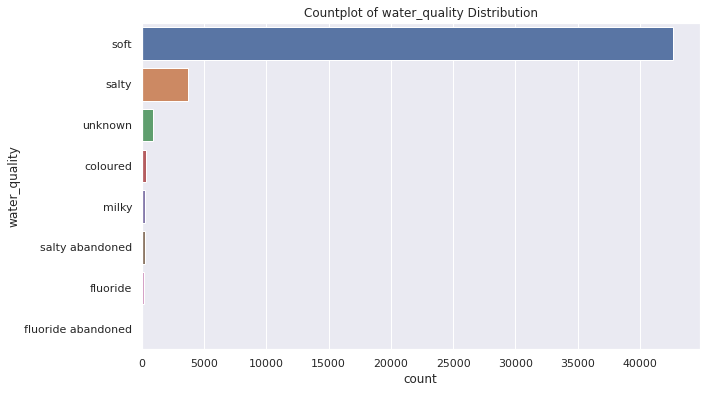

In [188]:
# countplot of water_quality distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='water_quality',
              data=train_final,
              order=train_final['water_quality'].value_counts().index).set_title("Countplot of water_quality Distribution")
plt.show()

From our plot most water points have soft water quality

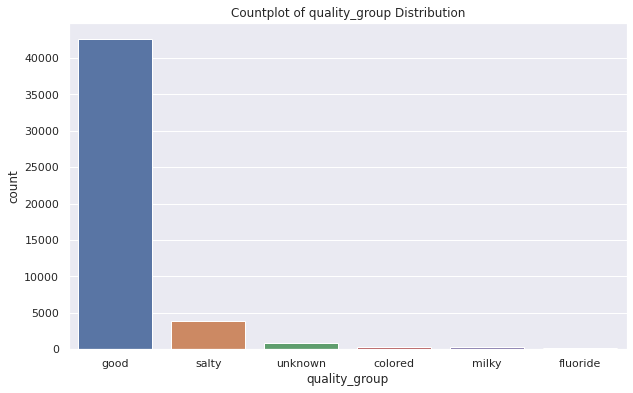

In [189]:
# countplot of quality_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quality_group',
              data=train_final,
              order=train_final['quality_group'].value_counts().index).set_title("Countplot of quality_group Distribution")
plt.show()

From our plot above good quality was the most common water quality group 

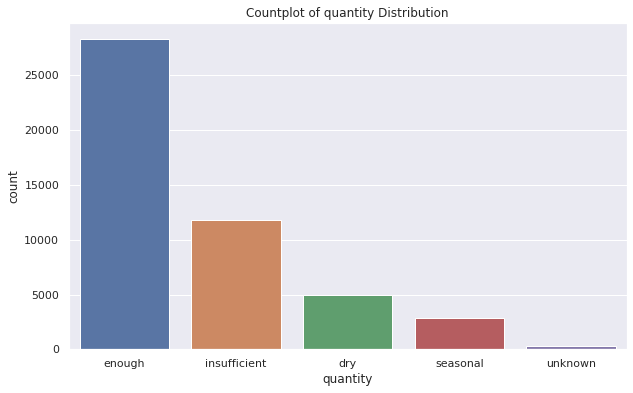

In [190]:
# countplot of quantity distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quantity',
              data=train_final,
              order=train_final['quantity'].value_counts().index).set_title("Countplot of quantity Distribution")
plt.show()

The water points mostly had enough water 

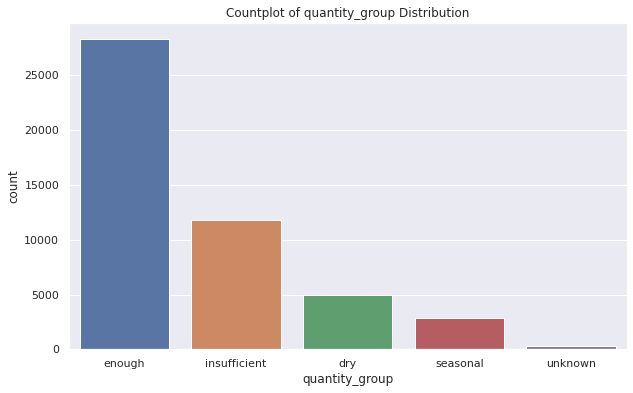

In [191]:
# countplot of quantity_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='quantity_group',
              data=train_final,
              order=train_final['quantity_group'].value_counts().index).set_title("Countplot of quantity_group Distribution")
plt.show()

The water points mostly had enough water

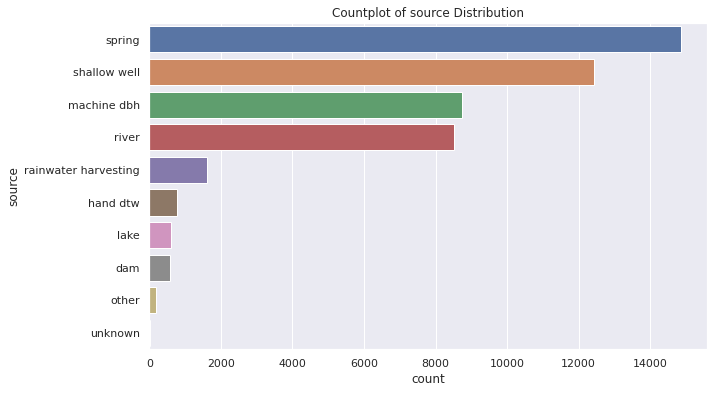

In [192]:
# countplot of source distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='source',
              data=train_final,
              order=train_final['source'].value_counts().index).set_title("Countplot of source Distribution")
plt.show()

Majority of the water points source of water is springs followed by shallow well.

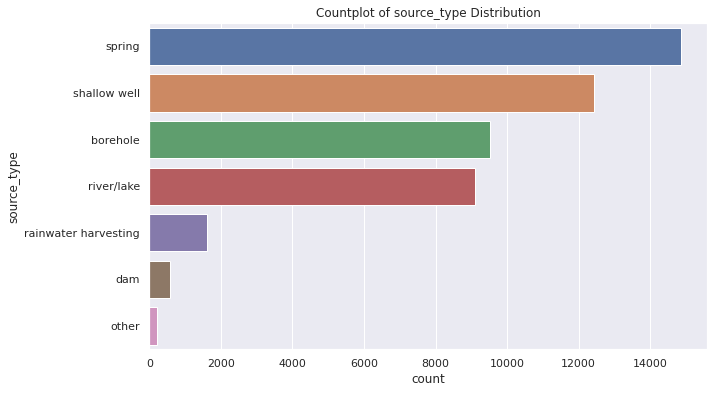

In [193]:
# countplot of source_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='source_type',
              data=train_final,
              order=train_final['source_type'].value_counts().index).set_title("Countplot of source_type Distribution")
plt.show()

Majority of the water points source of water is springs followed by shallow well.

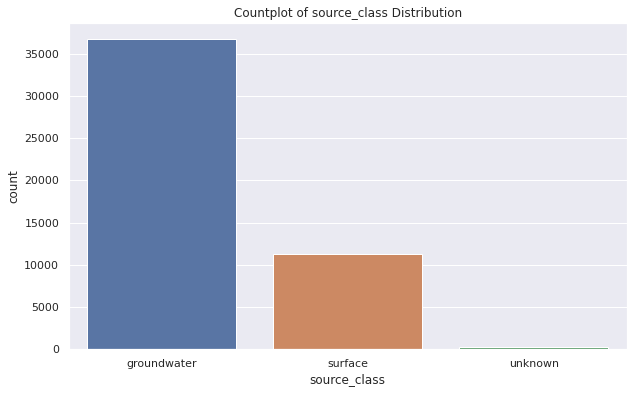

In [194]:
# countplot of source_class distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='source_class',
              data=train_final,
              order=train_final['source_class'].value_counts().index).set_title("Countplot of source_class Distribution")
plt.show()

From our plot above groundwater is the most common source class followed by surface

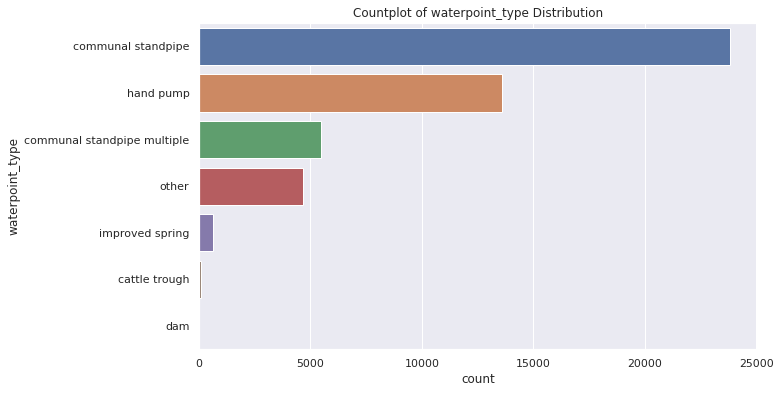

In [195]:
# countplot of waterpoint_type distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='waterpoint_type',
              data=train_final,
              order=train_final['waterpoint_type'].value_counts().index).set_title("Countplot of waterpoint_type Distribution")
plt.show()

The common waterpoint type was the communal standpipe followed by the hand pump

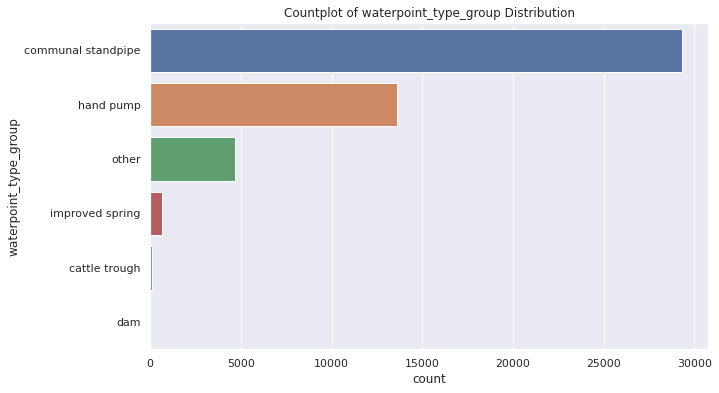

In [196]:
# countplot of waterpoint_type_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(y='waterpoint_type_group',
              data=train_final,
              order=train_final['waterpoint_type_group'].value_counts().index).set_title("Countplot of waterpoint_type_group Distribution")
plt.show()

The common waterpoint type group was the communal standpipe followed by the hand pump

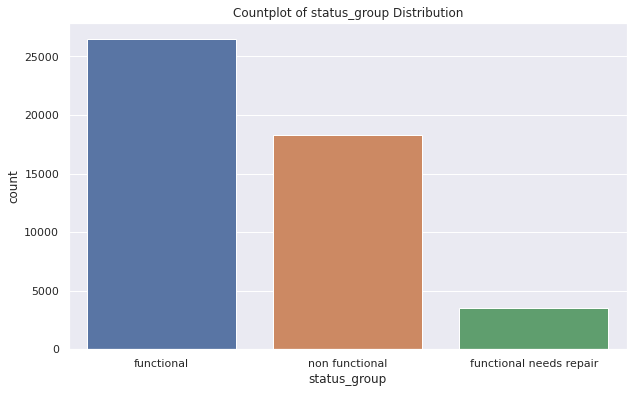

In [197]:
# countplot of status_group distributions
plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='status_group',
              data=train_final,
              order=train_final['status_group'].value_counts().index).set_title("Countplot of status_group Distribution")
plt.show()

Most of the water points status was functional and few were functional and needed repair

### **3. Frequency Tables**

In [198]:
categorical_columns = train_final[['basin', 'region', 
            'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group',
            'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality',
            'quality_group', 'quantity', 'quantity_group','source', 'source_type', 'source_class', 'waterpoint_type',
            'waterpoint_type_group', 'status_group']]


for column in categorical_columns:
  print('\n')
  print(f'number of unique values in {column} is: {train_final[column].nunique()}')
  print(train_final[column].value_counts())           




number of unique values in basin is: 9
Pangani                    8540
Lake Victoria              7319
Internal                   6155
Rufiji                     6031
Lake Tanganyika            5663
Wami / Ruvu                5127
Ruvuma / Southern Coast    3675
Lake Nyasa                 3376
Lake Rukwa                 2402
Name: basin, dtype: int64


number of unique values in region is: 21
Iringa           5220
Kilimanjaro      4206
Shinyanga        3680
Morogoro         2953
Kagera           2845
Arusha           2836
Kigoma           2774
Mbeya            2695
Tanga            2543
Pwani            2490
Mwanza           2378
Ruvuma           2115
Tabora           1862
Dodoma           1830
Rukwa            1741
Mtwara           1518
Manyara          1458
Singida          1040
Lindi            1005
Mara              755
Dar es Salaam     344
Name: region, dtype: int64


number of unique values in public_meeting is: 2
True     43940
False     4348
Name: public_meeting, dtype: int6

In [199]:
cat_cols = train_final[['funder','installer','wpt_name','subvillage','local_gvt_auth','ward']]

for col in cat_cols:
  print('\n')
  print(f'The top 20  values in {col}')
  print(train_final[col].value_counts().nlargest(20))
  



The top 20  values in funder
others                    23470
Government Of Tanzania     8080
Danida                     2920
Hesawa                     1388
Kkkt                       1260
World Bank                 1086
World Vision               1044
Unicef                     1005
Rwssp                       802
District Council            801
Tasaf                       787
Private Individual          766
Norad                       759
Germany Republi             610
Dwsp                        545
Tcrs                        544
Ministry Of Water           526
Water                       510
Dwe                         472
Netherlands                 457
Name: funder, dtype: int64


The top 20  values in installer
others                21880
DWE                   14637
Government             1438
RWE                    1031
Commu                   893
KKKT                    885
DANIDA                  861
TCRS                    668
Central government      616
CES             

In [200]:
for col in cat_cols:
  print('\n')
  print(f'The 10 least values in {col}')
  print(train_final[col].value_counts().nsmallest(10))



The 10 least values in funder
Dhv                   456
Netherlands           457
Dwe                   472
Water                 510
Ministry Of Water     526
Tcrs                  544
Dwsp                  545
Germany Republi       610
Norad                 759
Private Individual    766
Name: funder, dtype: int64


The 10 least values in installer
World vision        345
TASAF               347
Gover               352
HESAWA              368
WEDECO              379
District council    386
LGA                 400
District Council    538
Community           542
DANID               552
Name: installer, dtype: int64


The 10 least values in wpt_name
Shule Ya Msingi     144
Shule               146
Ofisini             205
Sokoni              222
Kanisani            250
Bombani             252
Msikitini           447
Zahanati            619
Shuleni            1354
none               3356
Name: wpt_name, dtype: int64


The 10 least values in subvillage
Mkwajuni      87
Mwenge        89
Mji

### **4. Pie Charts**

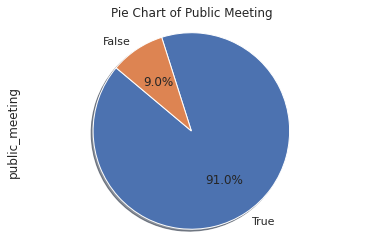

In [201]:
#Pie chart to show the percentage total of Publib meetings held
train_final['public_meeting'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of Public Meeting')
plt.show()

From our piechart of public meeting majority held public meeting with a percent of 91% while 9% did not.

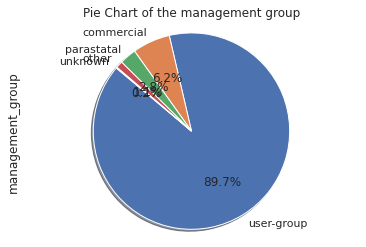

In [202]:
#Pie chart to show the percentage total of management groups
train_final['management_group'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the management group')
plt.show()

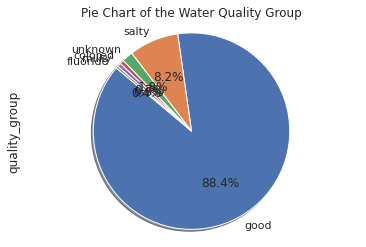

In [203]:
#Pie chart to show the percentage total of water quality group
train_final['quality_group'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Water Quality Group')
plt.show()

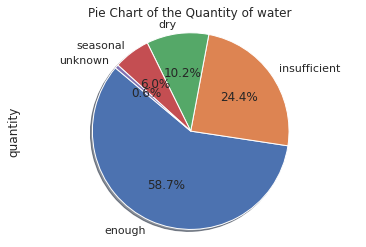

In [204]:
#Pie chart to show the percentage total of water quantity available at the water point
train_final['quantity'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Quantity of water ')
plt.show()

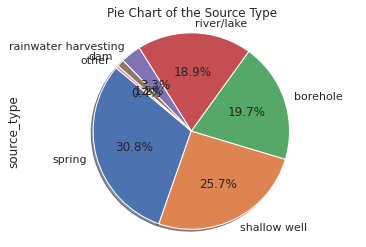

In [205]:
#Pie chart to show the percentage total of source type
train_final['source_type'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Source Type')
plt.show()

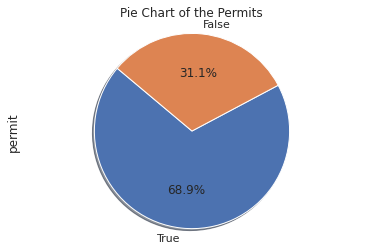

In [206]:
#Pie chart to show the percentage total of permits
train_final['permit'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------

plt.axis('equal')
plt.title('Pie Chart of the Permits')
plt.show()

From our plot above majority of the water points had permits leading at 68.9% while few did not have permits at 31.1%

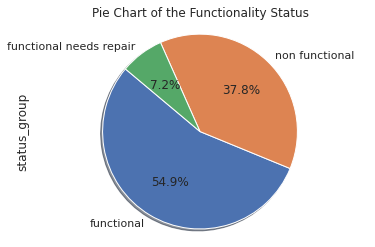

In [207]:
#Pie chart to show the percentage total of waterpoint status group
train_final['status_group'].value_counts().plot(kind='pie',autopct = '%1.1f%%', shadow = True, startangle = 140)
# labelling our pie chart
# -------
 
plt.axis('equal')
plt.title('Pie Chart of the Functionality Status')
plt.show()

The piechart shows class imbalance in the status group column with functional taking 54.9%, non-functional 37.8% and functional needs repair 7.2%

### **5. Measures of Central Tendency**

In [208]:
# assigning numerical columns
numerical_cols = train_final[['amount_water_available','altitude_of_well',"construction_year","population"]]

**Mode and median**

In [209]:
#mode and median
for col in numerical_cols:
  print("mode")
  print("Variable:",col)
  print(train_final[col].mode())
  print("median")
  print(train_final[col].median())
  print("\n")

mode
Variable: amount_water_available
0    0.0
dtype: float64
median
0.0


mode
Variable: altitude_of_well
0    0
dtype: int64
median
463.0


mode
Variable: construction_year
0    0
dtype: int64
median
1987.0


mode
Variable: population
0    0
dtype: int64
median
30.0




### **6. Measures of central dispersion**

**Variance**

In [210]:
#variance
numerical_cols.var().to_frame(name="Variance")

,Variance
amount_water_available,8.000056e+06
altitude_of_well,4.883371e+05
construction_year,8.782435e+05
population,2.232614e+05


**Standard Deviation**

In [211]:
#standard deviation
numerical_cols.std().to_frame(name="Standard Deviation")

,Standard Deviation
amount_water_available,2828.437040
altitude_of_well,698.811196
construction_year,937.146464
population,472.505399


**Range**

In [212]:
#range
max = numerical_cols.max()
min = numerical_cols.min()
range= max - min
range.to_frame(name="Range")

,Range
amount_water_available,250000.0
altitude_of_well,2860.0
construction_year,2013.0
population,30500.0


**Quantiles**

In [213]:
#quantiles
numerical_cols.quantile([0.25,0.50,0.75])

,amount_water_available,altitude_of_well,construction_year,population
0.25,0.0,0.0,0.0,0.0
0.50,0.0,463.0,1987.0,30.0
0.75,50.0,1335.0,2005.0,200.0


**Skewness**

In [214]:
skewness = numerical_cols.skew().reset_index(name="Skewness Value")
skewness.rename(columns={"index":"numerical columns"},inplace=True)
skewness.loc[skewness["Skewness Value"]==0,"Distribution"] ="Symmetric"
skewness.loc[skewness["Skewness Value"] > 0, "Distribution"] = "Positively Skewed"
skewness.loc[skewness["Skewness Value"] < 0, "Distribution"] = "Negatively Skewed"
skewness

,numerical columns,Skewness Value,Distribution
0,amount_water_available,43.636911,Positively Skewed
1,altitude_of_well,0.407391,Positively Skewed
2,construction_year,-0.734702,Negatively Skewed
3,population,13.617763,Positively Skewed


**Kurtosis**

In [215]:
kurtosis = numerical_cols.kurt().reset_index(name="Kurtosis Distribution")
kurtosis.rename(columns = {"index":"numerical_columns"},inplace=True)
kurtosis.loc[kurtosis['Kurtosis Distribution'] == 0,'Status'] = "Mesokurtic"
kurtosis.loc[kurtosis['Kurtosis Distribution'] > 0,'Status'] = "Leptokurtic"
kurtosis.loc[kurtosis['Kurtosis Distribution'] < 0,'Status'] = "Platykurtic"
kurtosis

,numerical_columns,Kurtosis Distribution,Status
0,amount_water_available,2700.130507,Leptokurtic
1,altitude_of_well,-1.304546,Platykurtic
2,construction_year,-1.459726,Platykurtic
3,population,465.347475,Leptokurtic


## **b) Bivariate Analysis**

In [216]:
# load sql extension
%load_ext sql
# connect to memory sqlite database
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @None'

In [217]:
# loading our libraries
import csv

# loading a table from a CSV file
with open('/content/clean_water.csv','r') as f:
  Train = pd.read_csv(f, index_col = 0, encoding = 'utf-8')

# store it in an sql table of our in memory sqlite database
%sql DROP TABLE IF EXISTS Train;
%sql PERSIST Train;

 * sqlite://
Done.
 * sqlite://


'Persisted train'

In [218]:
%%sql
SELECT installer,  MAX(extraction_type) FROM Train
GROUP BY installer 
ORDER BY installer ASC;

 * sqlite://
Done.


installer,MAX(extraction_type)
CES,gravity
Central government,swn 80
Commu,windmill
Community,windmill
DANID,swn 80
DANIDA,swn 80
DWE,windmill
District Council,swn 80
District council,submersible
Gover,swn 80


### **1. Lineplot**





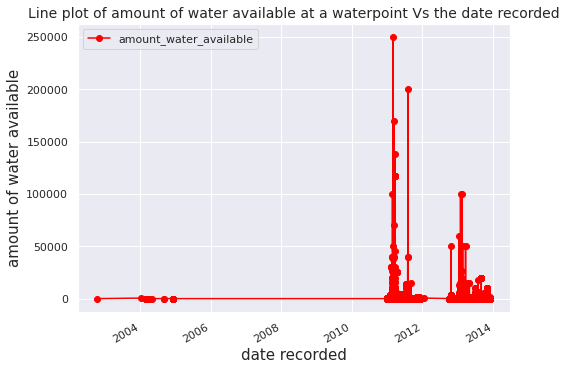

In [219]:
# Line plot of amount of water available at a waterpoint Vs the date recorded
train_final.plot(x="date_recorded",
                 y="amount_water_available",
                 kind="line",
                 color='red',
                 marker='o')
plt.title('Line plot of amount of water available at a waterpoint Vs the date recorded', fontsize=14)
plt.xlabel('date recorded',fontsize=15)
plt.ylabel('amount of water available', fontsize=15)
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.show()


**The amount of water available at a waterpoint in the year 2004 was low all the way till 2012 where there was high amounts of water recorded at the waterpoint.**

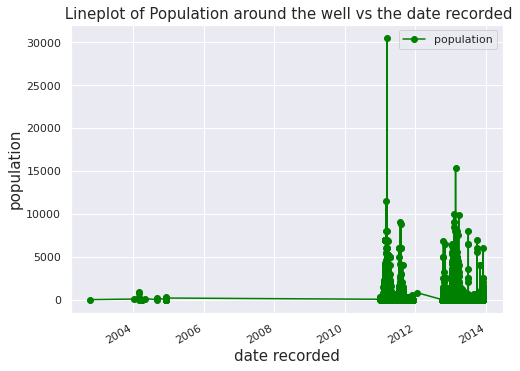

In [220]:
# Lineplot of Population around the well vs the date recorded

train_final.plot(x="date_recorded",
                 y="population",
                 kind="line",
                 color='green',
                 marker='o')
plt.title(' Lineplot of Population around the well vs the date recorded',  fontsize=15)
plt.xlabel('date recorded',  fontsize=15)
plt.ylabel('population',  fontsize=15)
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.grid(True)
plt.show()




**The population of people around the well was sparse from 2004 all the way till 2012 where there was a rise in the population.**




### **2. Geographical Maps**

In [221]:
import  plotly.express as px
import pandas as pd

fig = px.density_mapbox(train_final,lat="latitude",lon="longitude",z="amount_water_available",
                        radius=10,center=dict(lat=0,lon=180),zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

### **3. Correlation Matrix**

In [222]:
# Let's display the correlations between the variables
corr =train_final.corr()
corr

,id,amount_water_available,altitude_of_well,longitude,latitude,no_privatewells_aquifer,region_code,district_code,population,construction_year,age
id,1.000000,-0.007579,-0.007722,-0.004802,0.004128,-0.002507,-0.003313,-0.004696,-0.005044,-0.005848,-0.000752
amount_water_available,-0.007579,1.000000,0.089278,0.022986,-0.069826,0.002042,-0.031754,-0.035379,0.015778,0.078806,0.040425
altitude_of_well,-0.007722,0.089278,1.000000,0.142959,-0.116639,0.005784,-0.189451,-0.173956,0.112381,0.648160,0.381241
longitude,-0.004802,0.022986,0.142959,1.000000,-0.413738,0.026133,0.016730,0.140962,0.074188,0.401176,0.232064
latitude,0.004128,-0.069826,-0.116639,-0.413738,1.000000,0.010414,-0.243385,-0.184210,-0.050237,-0.303326,-0.202784
no_privatewells_aquifer,-0.002507,0.002042,0.005784,0.026133,0.010414,1.000000,-0.024750,-0.007113,0.005006,0.026755,0.019787
region_code,-0.003313,-0.031754,-0.189451,0.016730,-0.243385,-0.024750,1.000000,0.706632,0.085272,0.015928,0.001418
district_code,-0.004696,-0.035379,-0.173956,0.140962,-0.184210,-0.007113,0.706632,1.000000,0.068134,0.060502,0.021376
population,-0.005044,0.015778,0.112381,0.074188,-0.050237,0.005006,0.085272,0.068134,1.000000,0.245457,0.127648
construction_year,-0.005848,0.078806,0.648160,0.401176,-0.303326,0.026755,0.015928,0.060502,0.245457,1.000000,0.585210


There was no correlation among  the variables 

### 4  Distribution plot

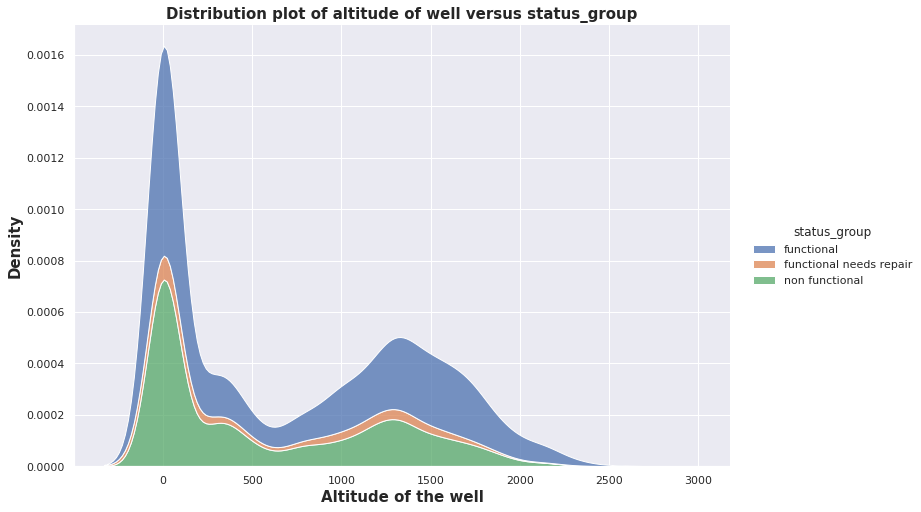

In [223]:
# distribution plot of altitude of well versus status_group
sns.displot(train_final, x='altitude_of_well',
            hue ='status_group',
            kind='kde',
            multiple='stack',
            height=7,
            aspect=1.5)
plt.title('Distribution plot of altitude of well versus status_group', fontsize=15,fontweight='bold')
plt.xlabel('Altitude of the well',fontsize=15, fontweight='bold')
plt.ylabel('Density', fontsize=15, fontweight='bold')
plt.show()

From our distribution plot majority of the water points were functional 

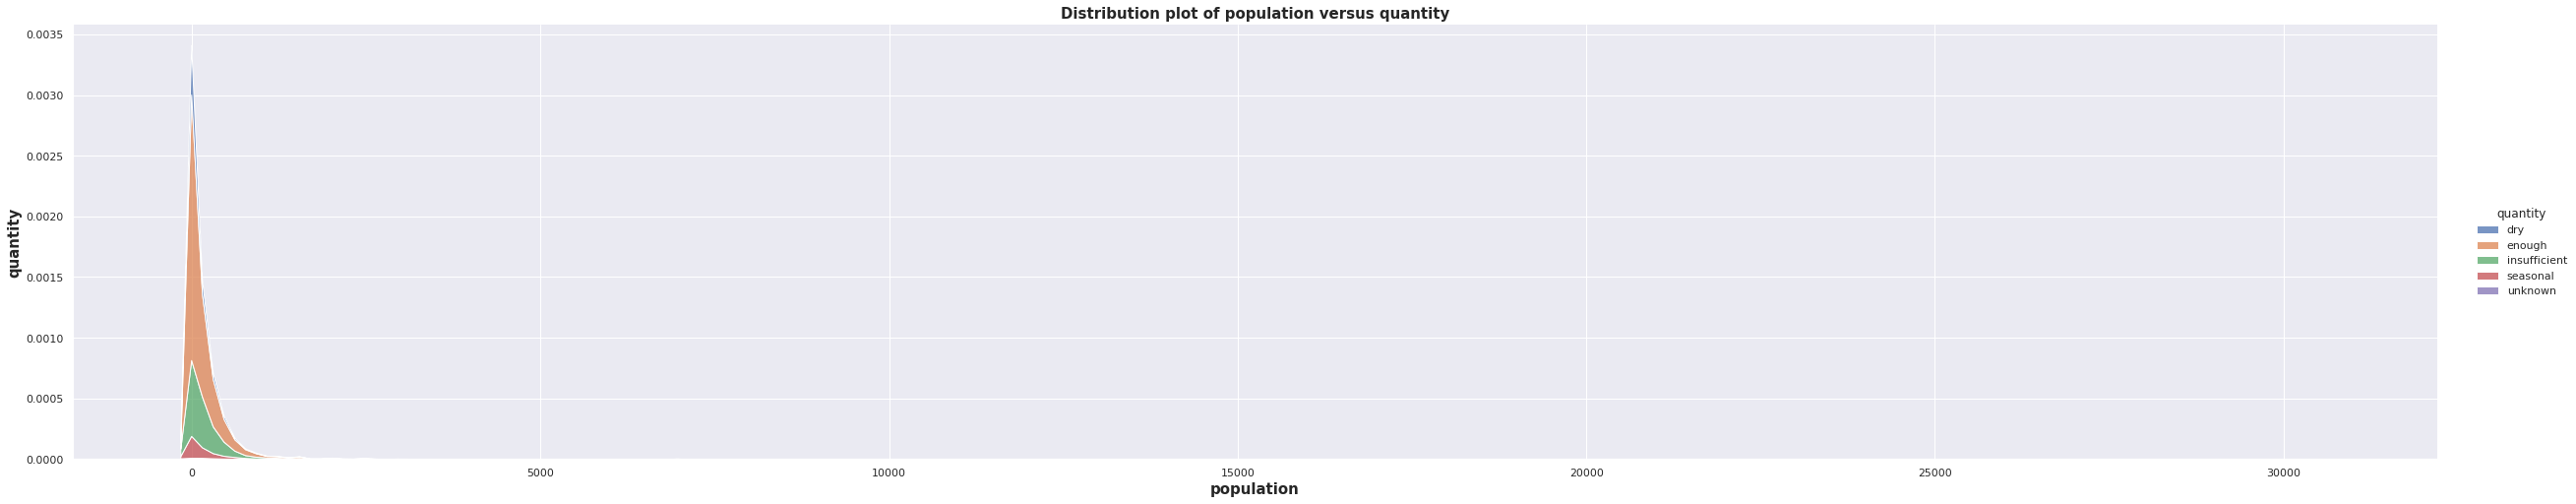

In [224]:
# distribution plot of population versus quantity
sns.displot(train_final, x='population',
            hue ='quantity',
            kind='kde',
            multiple='stack',
            height=7,
            aspect=5)
plt.title('Distribution plot of population versus quantity', fontsize=15,fontweight='bold')
plt.xlabel('population',fontsize=15, fontweight='bold')
plt.ylabel('quantity', fontsize=15, fontweight='bold')
plt.show()

### **5. Stacked column**

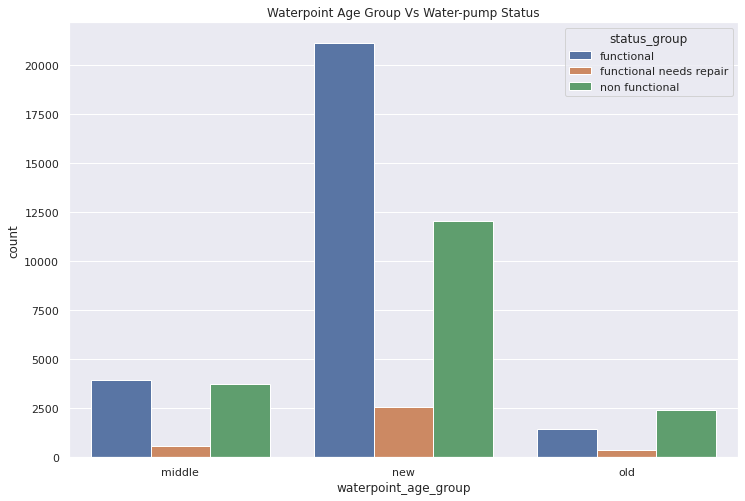

In [225]:
# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=train_final['waterpoint_age_group'], hue=train_final['status_group'])
plt.title('Waterpoint Age Group Vs Water-pump Status')
plt.show()

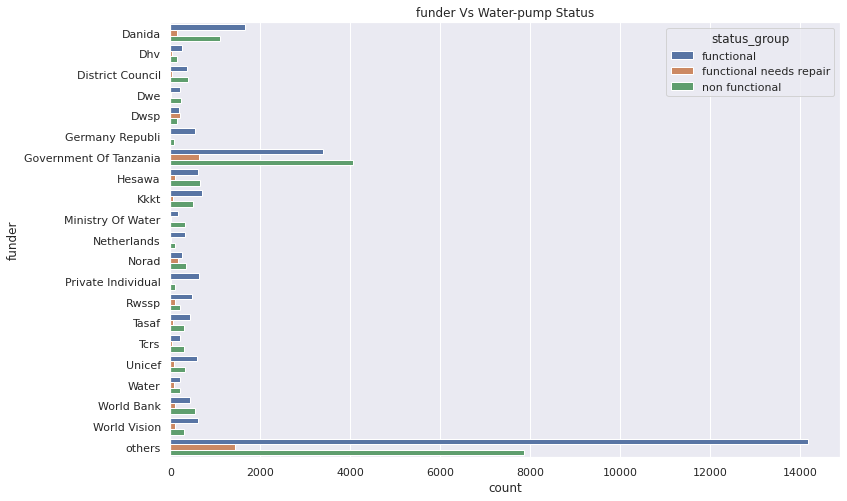

In [226]:
# Visualize Relation between funder Vs Water-pump Status
plt.subplots(figsize=(12,8))
sns.countplot(y=train_final['funder'], hue=train_final['status_group'])
plt.title('funder Vs Water-pump Status')
plt.show()

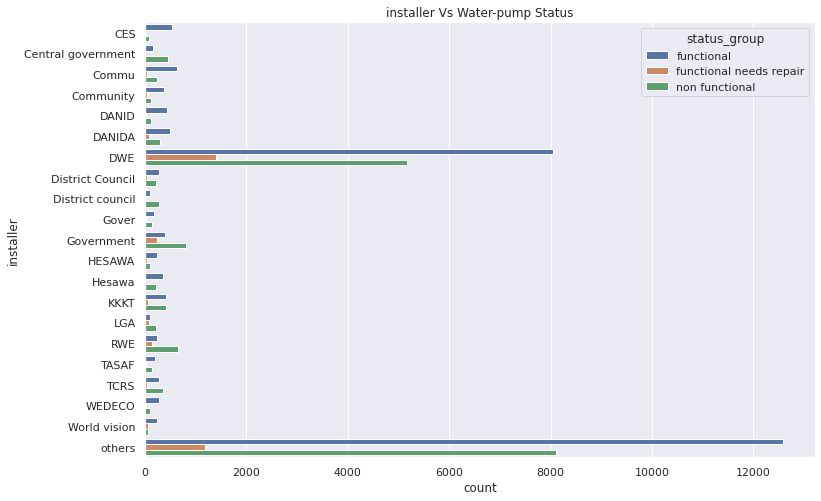

In [227]:
# Visualize Relation between installer Vs Water-pump Status
plt.subplots(figsize=(12,8))
sns.countplot(y=train_final['installer'], hue=train_final['status_group'])
plt.title('installer Vs Water-pump Status')
plt.show()

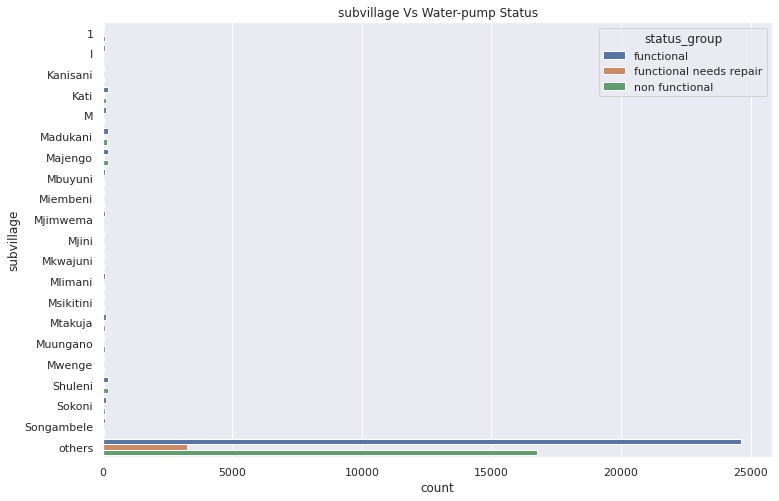

In [228]:
# Visualize Relation between subvillage Vs Water-pump Status
plt.subplots(figsize=(12,8))
sns.countplot(y=train_final['subvillage'], hue=train_final['status_group'])
plt.title('subvillage Vs Water-pump Status')
plt.show()

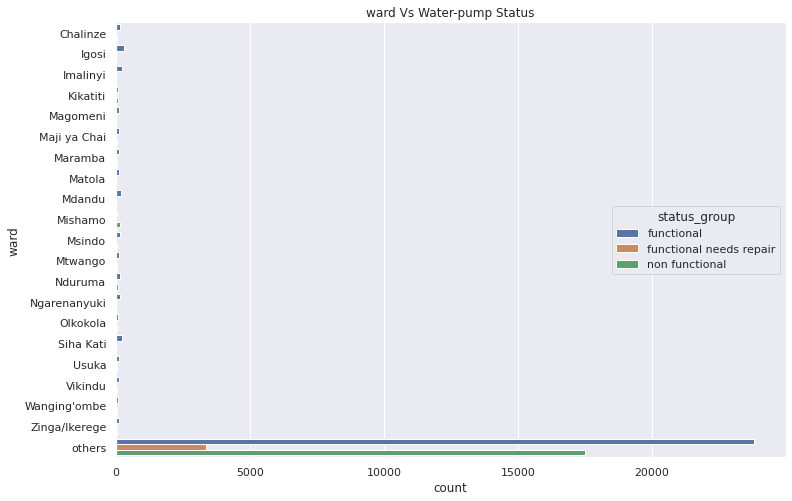

In [229]:
# Visualize Relation between ward Vs Water-pump Status
plt.subplots(figsize=(12,8))
sns.countplot(y=train_final['ward'], hue=train_final['status_group'])
plt.title('ward Vs Water-pump Status')
plt.show()

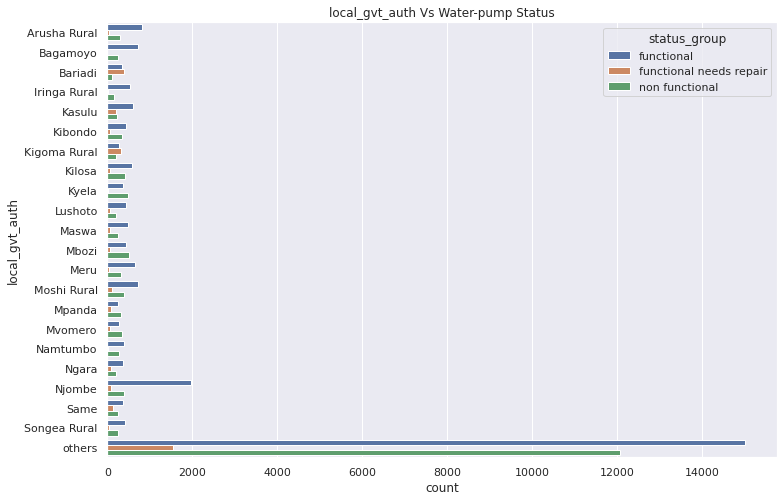

In [230]:
# Visualize Relation between local_gvt_auth Vs Water-pump Status
plt.subplots(figsize=(12,8))
sns.countplot(y=train_final['local_gvt_auth'], hue=train_final['status_group'])
plt.title('local_gvt_auth Vs Water-pump Status')
plt.show()

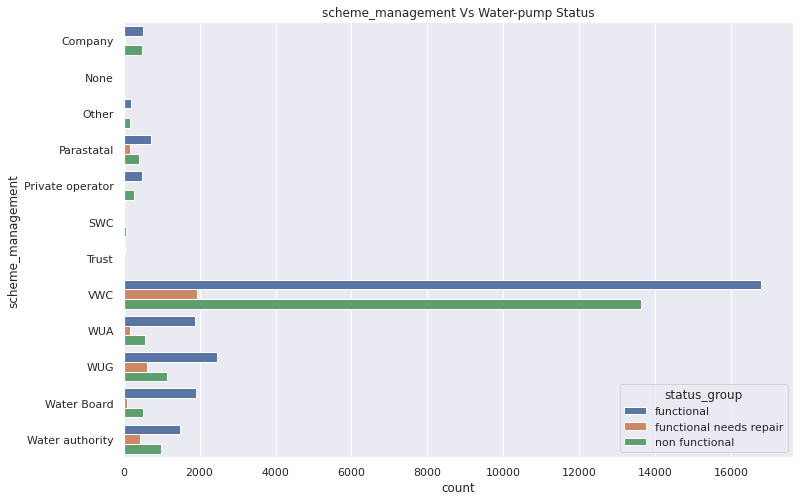

In [231]:
# Visualize Relation between scheme_management Vs Water-pump Status
plt.subplots(figsize=(12,8))
sns.countplot(y=train_final['scheme_management'], hue=train_final['status_group'])
plt.title('scheme_management Vs Water-pump Status')
plt.show()

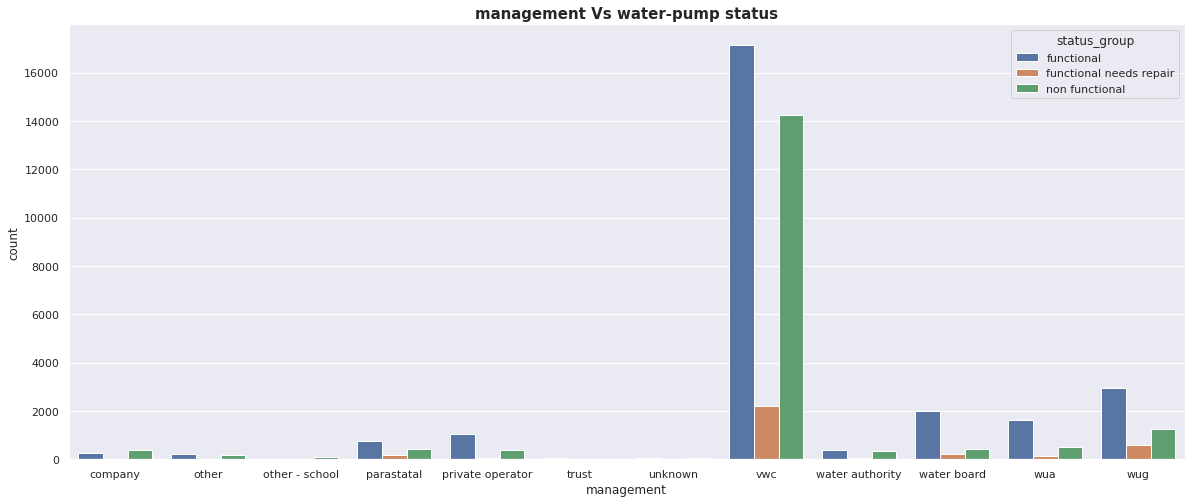

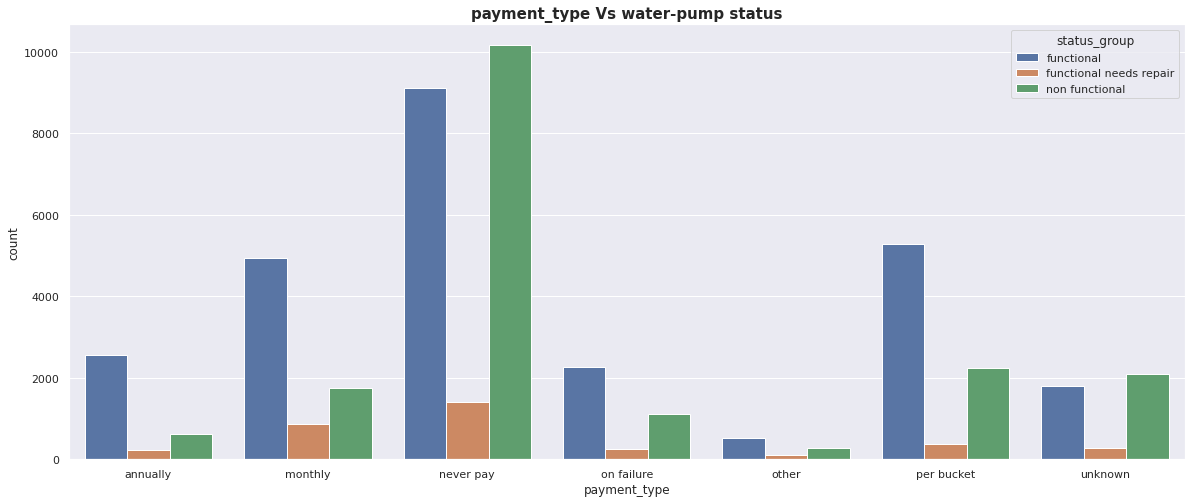

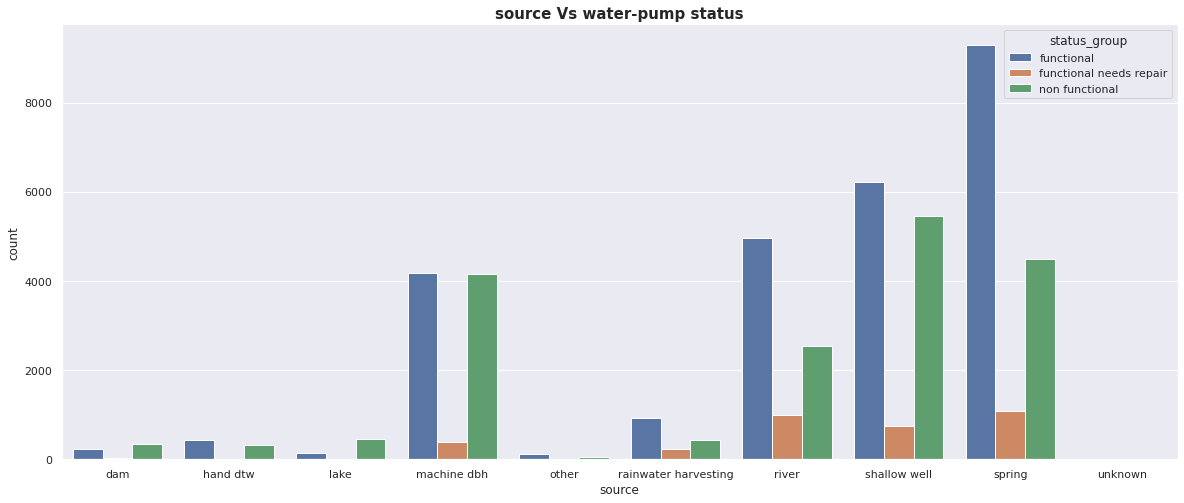

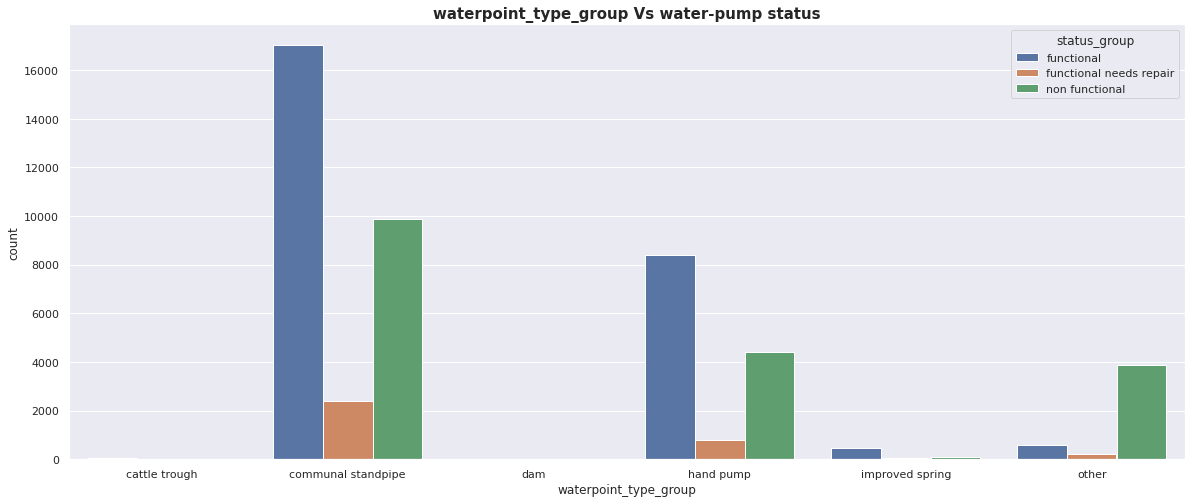

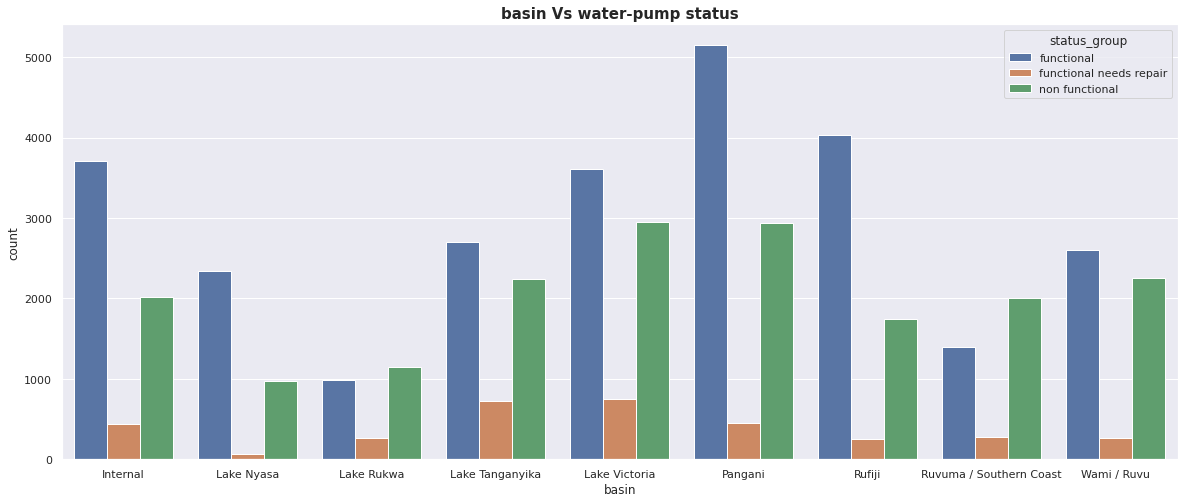

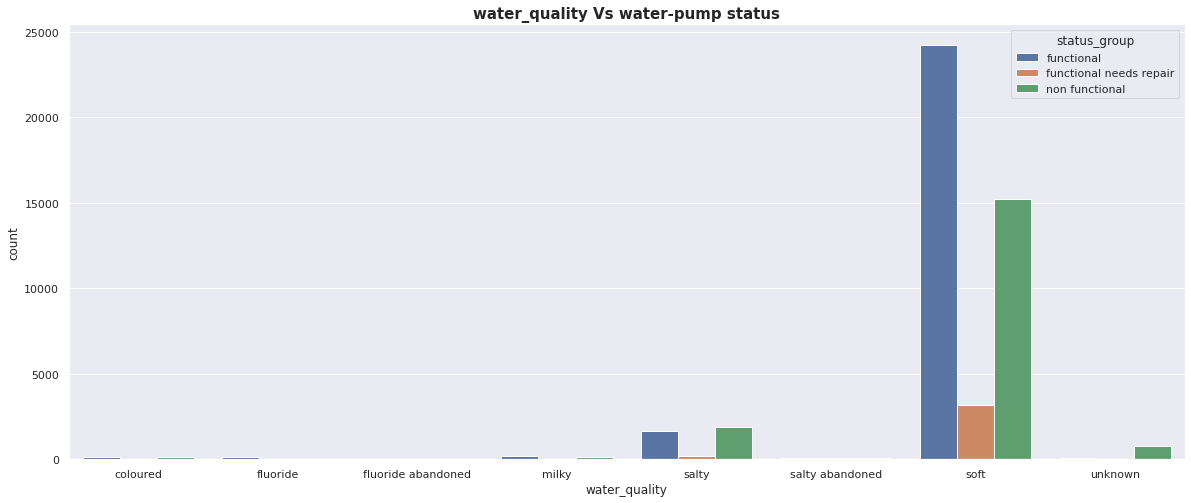

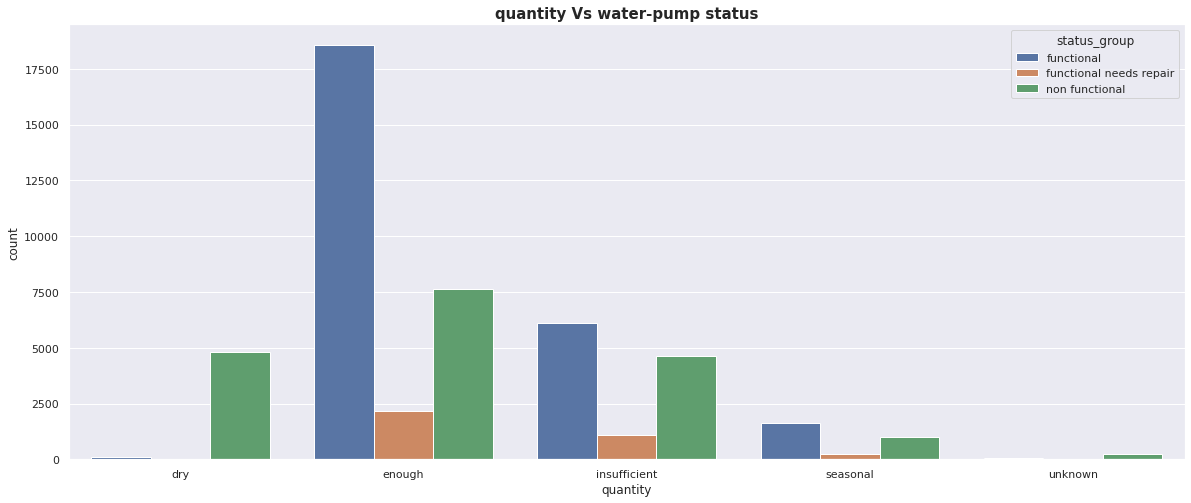

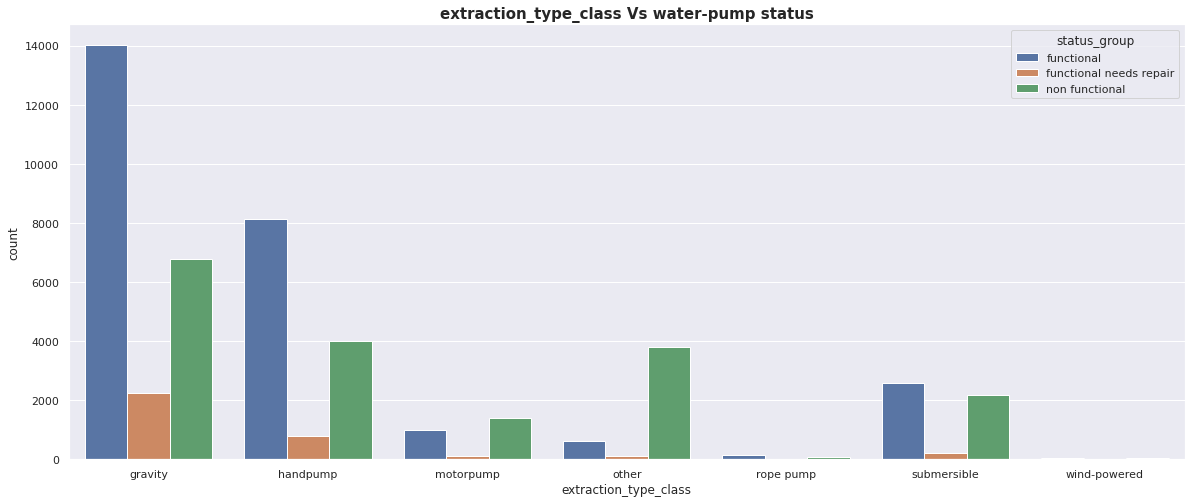

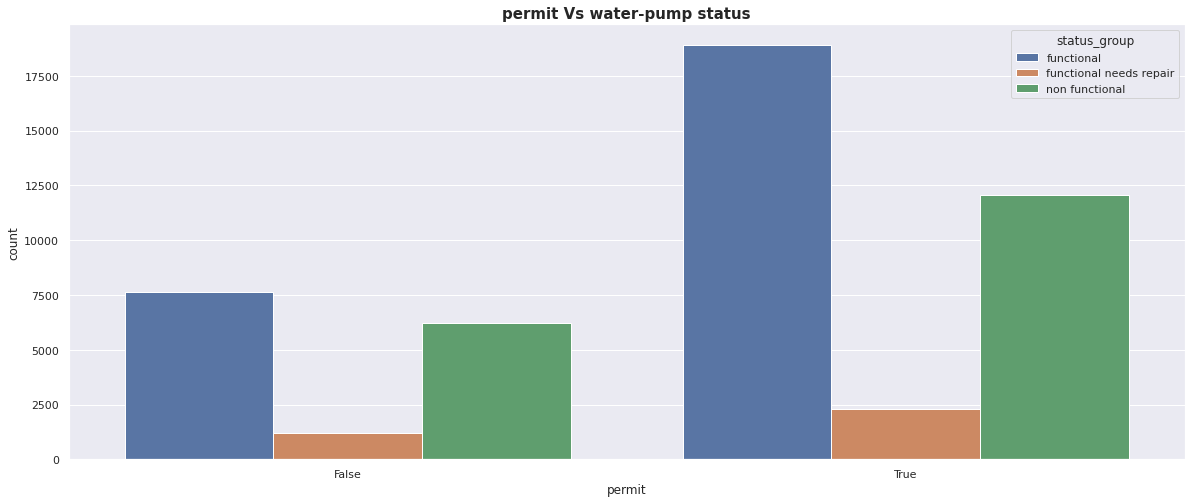

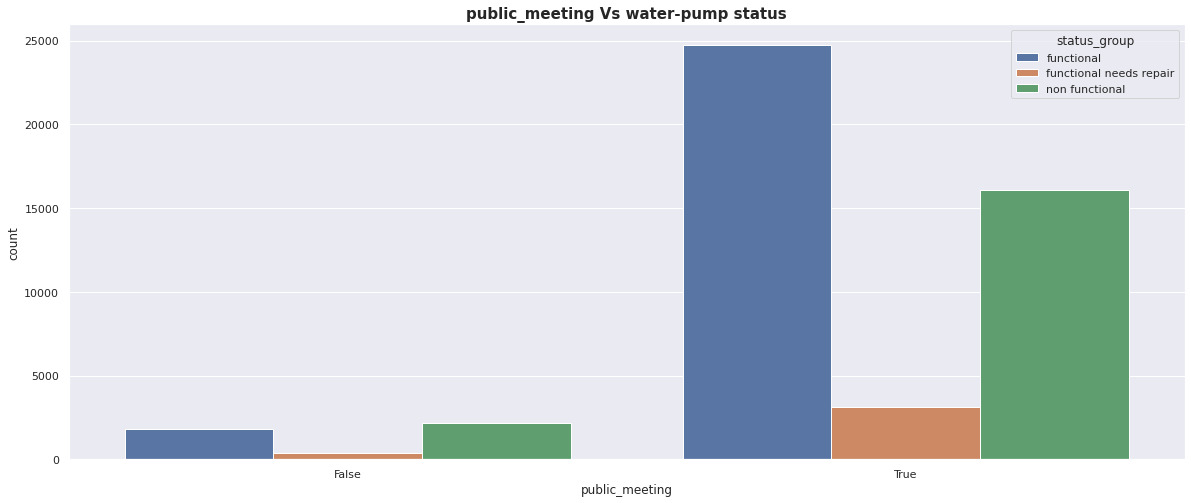

In [232]:
def plot_counts(featureX):
    plt.subplots(figsize=(20,8))
    sns.set(font_scale=1)
    sns.countplot(x=train_final[featureX], hue=train_final['status_group'])
    plt.title(f'{featureX} Vs water-pump status', fontsize=15,fontweight='bold')
    plt.show()
    return

# Management of Waterpoint
plot_counts('management')

# Payment Type of Waterpoint
plot_counts('payment_type')

# Water source of Waterpoint
plot_counts('source' )

# Water type group of Waterpoint
plot_counts("waterpoint_type_group")

# Basin of Waterpoint
plot_counts("basin")

# Water quality of Waterpoint
plot_counts("water_quality")

# Quantity of Waterpoint
plot_counts("quantity")

# extraction_type_class of Waterpoint
plot_counts("extraction_type_class")

# permit of Waterpoint
plot_counts("permit")

# public_meeting of Waterpoint
plot_counts("public_meeting")



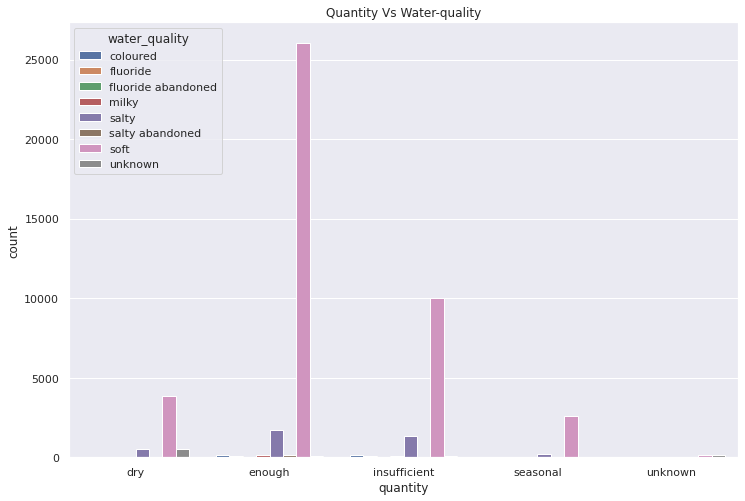

In [233]:
# Visualize Relation between Quantity Vs Water-quality
plt.subplots(figsize=(12,8))
sns.countplot(x=train_final['quantity'], hue=train_final['water_quality'])
plt.title('Quantity Vs Water-quality')
plt.show()

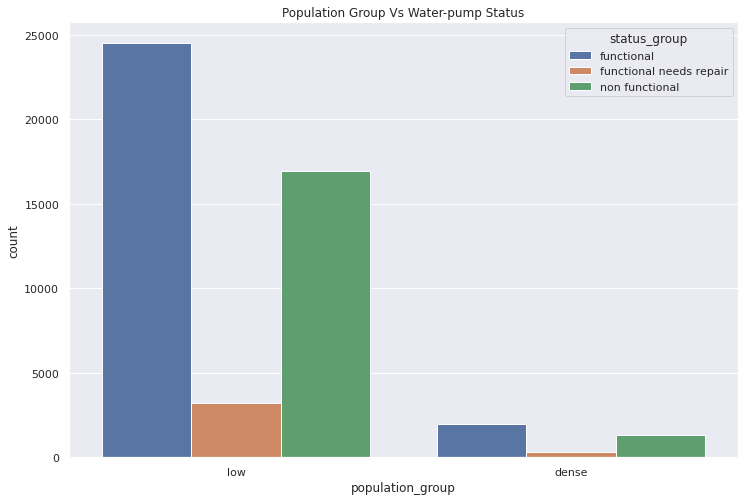

In [234]:
# Create Population Group to better assess the sparse data
def get_population_group(x):
    if x <= 500:
        return 'low'
    else:
        return 'dense'
    
train_final['population_group'] = train_final['population'].apply(get_population_group)

# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=train_final['population_group'], hue=train_final['status_group'])
plt.title('Population Group Vs Water-pump Status')
plt.show()

In a low populated area the waterpoint is most likely to be functional as compared to densely populated area. Also the waterpoints functioning needs repair are equally high in the low populated area

In [235]:
# convert category columns to category datatype
for col in ['population_group']:

    train_final[col] = train_final[col].astype('category')

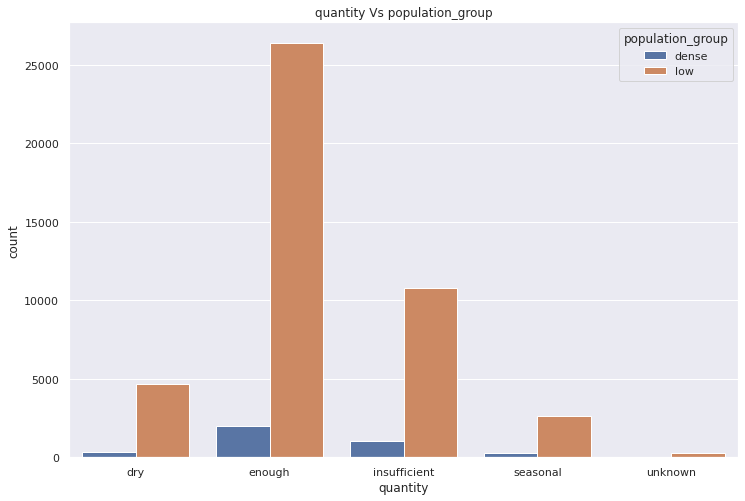

In [236]:
# Visualize Relation
plt.subplots(figsize=(12,8))
sns.countplot(x=train_final['quantity'], hue=train_final['population_group'])
plt.title('quantity Vs population_group')
plt.show()

Text(0.5, 0, 'source')

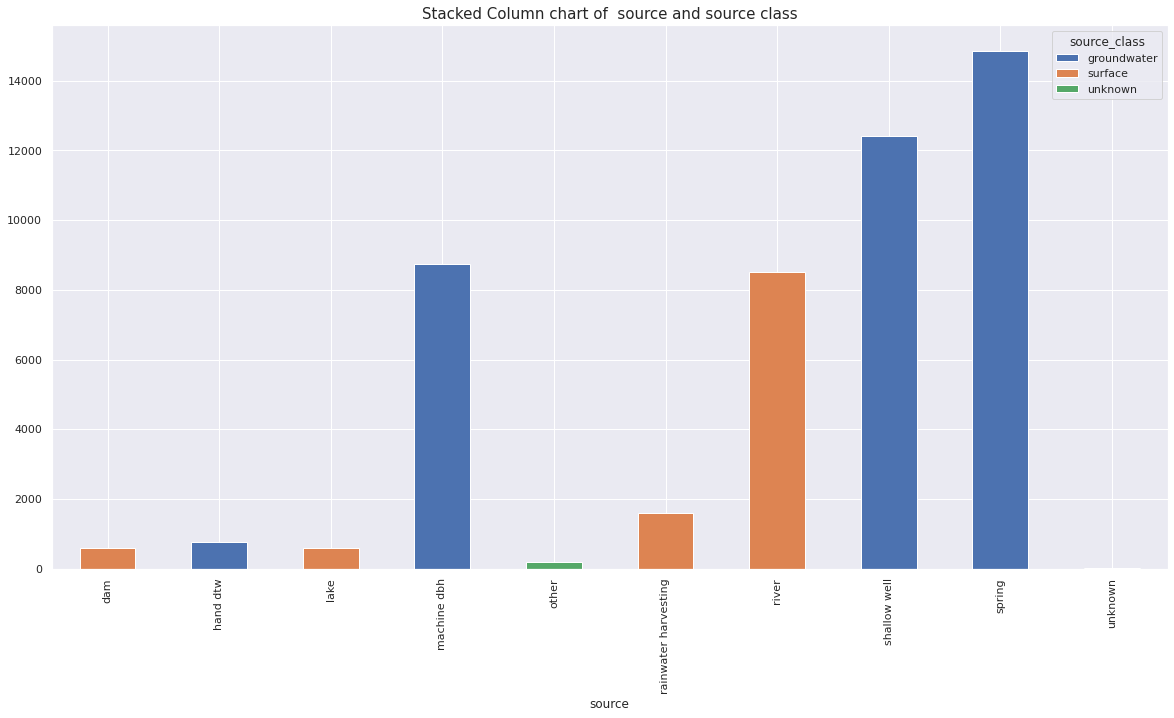

In [237]:
# Stacked Column Chart 
pd.crosstab(train_final['source'],train_final['source_class']).plot(kind="bar",stacked=True,figsize=(20,10))
plt.title('Stacked Column chart of  source and source class',fontsize=(15))
plt.xlabel('source',fontsize=(12))


From our plot above this dataset has correctly classified the sources to their respective source class

Text(0.5, 0, 'basin')

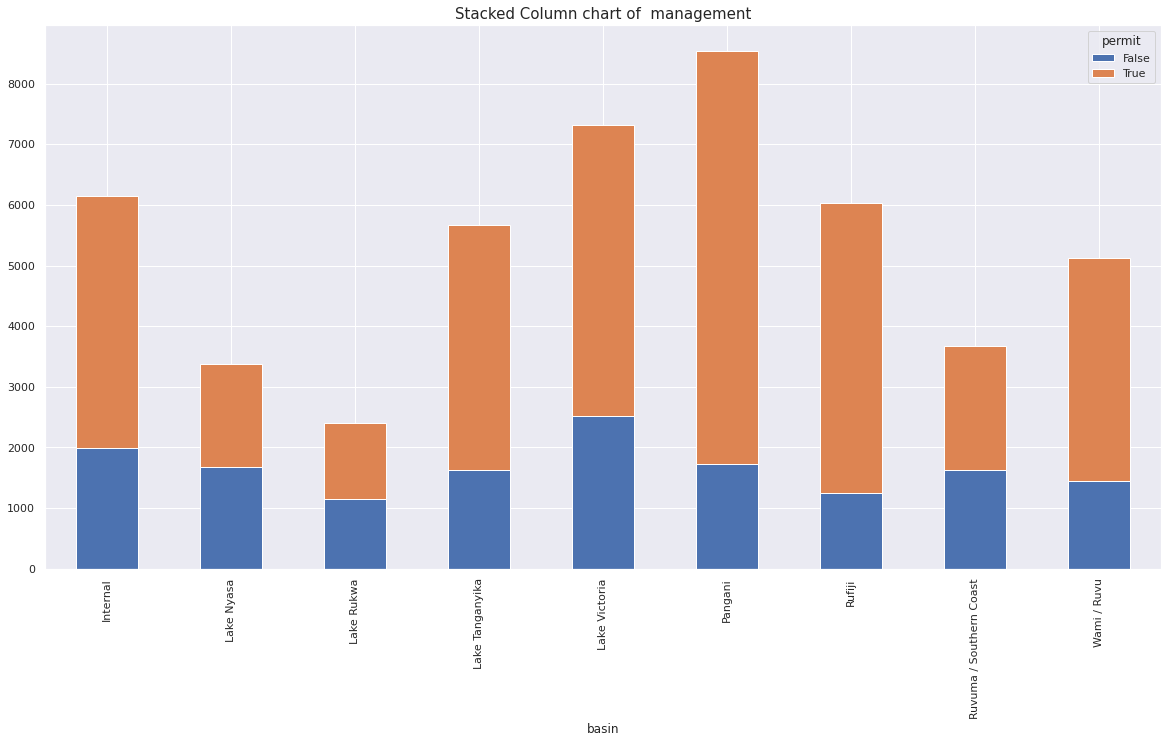

In [238]:
# Stacked Column Chart 
pd.crosstab(train_final['basin'],train_final['permit']).plot(kind="bar",stacked=True,figsize=(20,10))
plt.title('Stacked Column chart of  management',fontsize=(15))
plt.xlabel('basin',fontsize=(12))


From our plot majority of the water basins had permits.

##**c) Multivariate Analysis**

In [239]:
# dropping some columns
train_df = train_final.drop(train_final[['id','longitude','latitude','region_code','district_code','funder','installer','water_quality','wpt_name','subvillage','local_gvt_auth','ward','quantity_group','source_type','waterpoint_type_group']], axis =1)
train_df.head(0)

,amount_water_available,date_recorded,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,age,waterpoint_age_group,population_group


In [240]:
cat_cols = train_final.select_dtypes(include='category')
cat_cols.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'local_gvt_auth', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'waterpoint_age_group', 'population_group'],
      dtype='object')

## encoding methods 

### Method 1: Label Encoding

In [241]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
train_df['basin'] = labelencoder.fit_transform(train_df['basin'])
train_df['region'] = labelencoder.fit_transform(train_df['region'])
train_df['public_meeting'] = labelencoder.fit_transform(train_df['public_meeting'])
train_df['recorded_by'] = labelencoder.fit_transform(train_df['recorded_by'])
train_df['scheme_management'] = labelencoder.fit_transform(train_df['scheme_management'])
train_df['permit'] = labelencoder.fit_transform(train_df['permit'])
train_df['extraction_type'] = labelencoder.fit_transform(train_df['extraction_type'])
train_df['extraction_type_group'] = labelencoder.fit_transform(train_df['extraction_type_group'])
train_df['extraction_type_class'] = labelencoder.fit_transform(train_df['extraction_type_class'])
train_df['management'] = labelencoder.fit_transform(train_df['management'])
train_df['management_group'] = labelencoder.fit_transform(train_df['management_group'])
train_df['payment'] = labelencoder.fit_transform(train_df['payment'])
train_df['payment_type'] = labelencoder.fit_transform(train_df['payment_type'])
train_df['quality_group'] = labelencoder.fit_transform(train_df['quality_group'])
train_df['quantity'] = labelencoder.fit_transform(train_df['quantity'])
train_df['source'] = labelencoder.fit_transform(train_df['source'])
train_df['source_class'] = labelencoder.fit_transform(train_df['source_class'])
train_df['waterpoint_type'] = labelencoder.fit_transform(train_df['waterpoint_type'])
train_df['status_group'] = labelencoder.fit_transform(train_df['status_group'])
train_df['population_group'] = labelencoder.fit_transform(train_df['population_group'])
train_df['construction_year'] = labelencoder.fit_transform(train_df['construction_year'])
train_df['waterpoint_age_group'] = labelencoder.fit_transform(train_df['waterpoint_age_group'])

In [242]:
train_df = train_df.drop(['date_recorded','population_group','recorded_by'], axis=1)

In [243]:
train_df.head(2)

,amount_water_available,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,age,waterpoint_age_group
0,6000.0,1390,0,1,3,109,1,7,0,40,3,1,0,7,4,2,0,2,1,8,0,1,0,14,1
2,25.0,686,0,5,8,250,1,7,1,50,3,1,0,7,4,4,5,2,1,0,1,2,0,4,1


### **Correlation plots**

In [244]:
# Let's display the correlations between the variables
corr = train_df.corr() > 0.5
corr


,amount_water_available,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quality_group,quantity,source,source_class,waterpoint_type,status_group,age,waterpoint_age_group
amount_water_available,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
altitude_of_well,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
no_privatewells_aquifer,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
basin,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
region,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
population,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
public_meeting,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
scheme_management,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
permit,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
construction_year,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


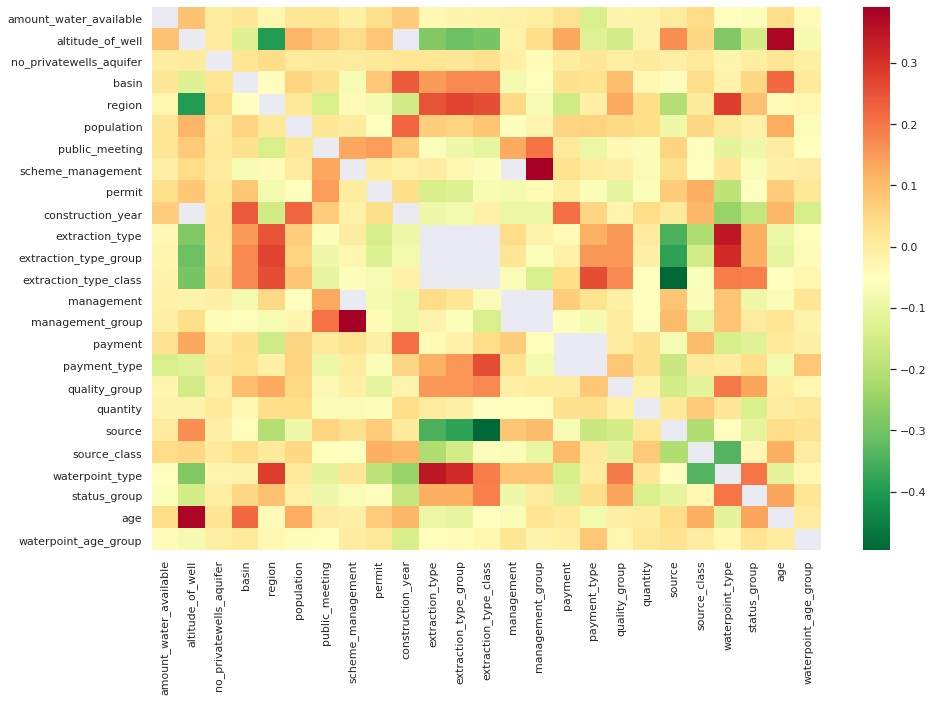

In [245]:
c = train_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(c, cmap='RdYlGn_r', mask = (np.abs(c) >= 0.5))
plt.show()

In [246]:
# Create correlation matrix
corr_matrix = train_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop

['construction_year',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment_type']

In [247]:
# Drop features 
train_df = train_df.drop(train_df[to_drop], axis=1)

### **PCA**

In [248]:
#applying pca
from sklearn.decomposition import PCA


X = train_df.iloc[:,1:23]
y = train_df['status_group'].values

# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [249]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.13850776, 0.08519594, 0.07545559, 0.06963598, 0.06723267,
       0.05868693, 0.05800999, 0.05546764, 0.05349896, 0.04877159,
       0.04734226, 0.0447826 , 0.04381676, 0.04086394, 0.03896758,
       0.02946362, 0.0247702 , 0.01952997])

In [250]:
#cumulative explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.13850776, 0.22370371, 0.2991593 , 0.36879527, 0.43602794,
       0.49471487, 0.55272486, 0.60819251, 0.66169147, 0.71046306,
       0.75780533, 0.80258793, 0.84640469, 0.88726863, 0.92623621,
       0.95569983, 0.98047003, 1.        ])

The first 13 principal components explain 86% of the variation.

# **7.0 Implementing the Solution**

### **Multicollinearity**

In [251]:
train_final.head(1)

,id,amount_water_available,date_recorded,funder,altitude_of_well,installer,longitude,latitude,wpt_name,no_privatewells_aquifer,basin,subvillage,region,region_code,district_code,local_gvt_auth,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,age,waterpoint_age_group,population_group
0,69572,6000.0,2011-03-14,others,1390,others,34.938093,-9.856322,none,0,Lake Nyasa,others,Iringa,11,5,others,others,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,14,new,low


In [252]:
y = train_final.select_dtypes(include='number')
y.columns

Index(['id', 'amount_water_available', 'altitude_of_well', 'longitude',
       'latitude', 'no_privatewells_aquifer', 'region_code', 'district_code',
       'population', 'construction_year', 'age'],
      dtype='object')

In [253]:
# checking for multicollinearity using VIF
correlations = train_df[['amount_water_available','altitude_of_well','no_privatewells_aquifer','population']].corr()

VIF = pd.DataFrame(np.linalg.inv(correlations.values),
                   index=correlations.index,
                   columns=correlations.columns)
VIF

,amount_water_available,altitude_of_well,no_privatewells_aquifer,population
amount_water_available,1.008071,-0.089331,-0.001512,-0.005858
altitude_of_well,-0.089331,1.020735,-0.005154,-0.113276
no_privatewells_aquifer,-0.001512,-0.005154,1.000055,-0.004403
population,-0.005858,-0.113276,-0.004403,1.012844


There is no adverse multicollinearity in our numerical columns.

### NORMALITY TESTS

In [254]:
## Checking for normality
from scipy.stats import shapiro

def shapiro_test(train_df, col_list):
    for x in col_list:
        print(x)
        data = train_df[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian')
        else:
            print('Sample does not look Gaussian')
        print('\n')
# shapiro Wilk's test
shapiro_test(train_df, list(train_df.columns))

amount_water_available
Statistics=0.082, p=0.000
Sample does not look Gaussian


altitude_of_well
Statistics=0.852, p=0.000
Sample does not look Gaussian


no_privatewells_aquifer
Statistics=0.017, p=0.000
Sample does not look Gaussian


basin
Statistics=0.937, p=0.000
Sample does not look Gaussian


region
Statistics=0.939, p=0.000
Sample does not look Gaussian


population
Statistics=0.342, p=0.000
Sample does not look Gaussian


public_meeting
Statistics=0.322, p=0.000
Sample does not look Gaussian


scheme_management
Statistics=0.726, p=0.000
Sample does not look Gaussian


permit
Statistics=0.583, p=0.000
Sample does not look Gaussian


extraction_type
Statistics=0.811, p=0.000
Sample does not look Gaussian


payment
Statistics=0.831, p=0.000
Sample does not look Gaussian


quality_group
Statistics=0.417, p=0.000
Sample does not look Gaussian


quantity
Statistics=0.815, p=0.000
Sample does not look Gaussian


source
Statistics=0.817, p=0.000
Sample does not look Gaussian


source

None of our columns exhibited a gaussian distribution.

## Sampling

### Synthetic Minority Oversampling Technique(*SMOTE*) 

In [255]:
# class count
status_count_0, status_count_1, status_count_2 = train_df['status_group'].value_counts()

# Separate class
status_0 = train_df[train_df['status_group'] == 0]
status_1 = train_df[train_df['status_group'] == 1]# print the shape of the class
status_2 = train_df[train_df['status_group'] == 2]
print('status 0:', status_0.shape)
print('status 1:', status_1.shape)
print('status 2:', status_2.shape)    

status 0: (26517, 19)
status 1: (3498, 19)
status 2: (18273, 19)


**Rearranging the columns.**

In [256]:
train_df = train_df[['amount_water_available', 'altitude_of_well', 'no_privatewells_aquifer',
       'basin', 'region', 'population', 'public_meeting', 'scheme_management',
       'permit', 'extraction_type', 'payment', 'quality_group', 'quantity',
       'source', 'source_class', 'waterpoint_type', 'age',
       'waterpoint_age_group','status_group',]]

In [257]:
train_df.head(1)

,amount_water_available,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,scheme_management,permit,extraction_type,payment,quality_group,quantity,source,source_class,waterpoint_type,age,waterpoint_age_group,status_group
0,6000.0,1390,0,1,3,109,1,7,0,3,2,2,1,8,0,1,14,1,0


Class=0, n=26517 (33.333%)
Class=2, n=26517 (33.333%)
Class=1, n=26517 (33.333%)


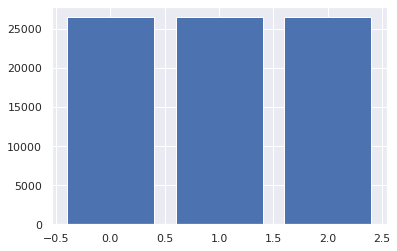

In [259]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot

# split into input and output elements
X = train_df.iloc[:,1:18]
y = train_df['status_group']

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [325]:
# split into input and output elements
X = train_df.iloc[:,1:18]
y = train_df['status_group']

In [326]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train = pd.DataFrame(y_train_oversampled)

In [329]:
X_train.head()

,altitude_of_well,no_privatewells_aquifer,basin,region,population,public_meeting,scheme_management,permit,extraction_type,payment,quality_group,quantity,source,source_class,waterpoint_type,age,waterpoint_age_group
0,95,0,8,14,4208,0,4,0,14,4,4,1,3,0,2,5,1
1,1908,0,0,0,150,1,3,0,3,0,2,3,5,1,1,0,1
2,389,0,7,7,580,1,7,0,9,0,4,1,7,0,6,32,0
3,1306,0,4,17,500,1,3,0,3,2,2,3,5,1,1,6,1
4,63,0,8,14,1000,1,7,0,3,0,2,2,6,1,1,35,2


## **Dimensionality reduction**

In [314]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA(n_components=15)
lda = lda.fit(X, y)
lda_feat = lda.transform(X)
#lda coefficients
lda.coef_
# Since the coefficients are in an array, we need to create a dataframe so that we can extract the name of the columns
Important_features = pd.DataFrame(index=X.columns.values, data=lda.coef_[0].T)
Important_features.sort_values(0, ascending=False)  


,0
public_meeting,0.191870
quantity,0.179913
permit,0.052129
payment,0.040767
source,0.031977
scheme_management,0.024494
basin,0.018684
region,0.011396
altitude_of_well,0.000271
no_privatewells_aquifer,0.000068


Feature Selection

In [315]:
cat = train_final.select_dtypes(include='category')
cat.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'local_gvt_auth', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'waterpoint_age_group', 'population_group'],
      dtype='object')

In [330]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Multinomial Logistic Regression

In [341]:
# split into input and output elements
X = train_df.iloc[:,1:18]
y = train_df['status_group']

In [342]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [343]:
# loading our libraries
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [344]:
# Predict the response for the test set
y_pred = LogReg.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6072685856284945
              precision    recall  f1-score   support

           0       0.61      0.85      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.60      0.38      0.46      3595

    accuracy                           0.61      9658
   macro avg       0.40      0.41      0.39      9658
weighted avg       0.56      0.61      0.56      9658



**Optimizing our model**

In [ ]:
LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

parameters = {'C' : [0.001,0.01,0.1,1.0,10,100,1000]}
              
# Creating grid search using 10-fold cross validation
clf = GridSearchCV(LogReg, param_grid = parameters, cv=10, scoring='accuracy', refit=True , n_jobs = -1)


clf.fit(X_train, y_train)
print('These are the best parameters for the model using a 10 fold cross validation :\n\n', clf.best_params_)

These are the best parameters for the model using a 10 fold cross validation :

 {'C': 0.01}


In [345]:
# Using our model to make a prediction

LogReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C = 0.01)

LogReg = LogReg.fit(X_train,y_train)

y_pred = LogReg.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.612652723131083
[[4488    0  816]
 [ 613    0  146]
 [2166    0 1429]]
              precision    recall  f1-score   support

           0       0.62      0.85      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.60      0.40      0.48      3595

    accuracy                           0.61      9658
   macro avg       0.41      0.41      0.40      9658
weighted avg       0.56      0.61      0.57      9658



## Random Forest

In [346]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [347]:
test_features = train_df.columns.to_list()
test_features.remove('status_group')
# Get numerical feature importances
importances = list(clf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()
# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:10} Importance: {}'.format(*pair)) for pair in feature_importances];

[('amount_water_available', 0.18), ('altitude_of_well', 0.0), ('no_privatewells_aquifer', 0.04), ('basin', 0.05), ('region', 0.1), ('population', 0.01), ('public_meeting', 0.04), ('scheme_management', 0.02), ('permit', 0.06), ('extraction_type', 0.06), ('payment', 0.02), ('quality_group', 0.16), ('quantity', 0.04), ('source', 0.01), ('source_class', 0.08), ('waterpoint_type', 0.1), ('age', 0.01)]

Variable: amount_water_available Importance: 0.18
Variable: quality_group Importance: 0.16
Variable: region     Importance: 0.1
Variable: waterpoint_type Importance: 0.1
Variable: source_class Importance: 0.08
Variable: permit     Importance: 0.06
Variable: extraction_type Importance: 0.06
Variable: basin      Importance: 0.05
Variable: no_privatewells_aquifer Importance: 0.04
Variable: public_meeting Importance: 0.04
Variable: quantity   Importance: 0.04
Variable: scheme_management Importance: 0.02
Variable: payment    Importance: 0.02
Variable: population Importance: 0.01
Variable: source  

In [348]:
# predict based on the model we have trained
y_pred = clf.predict(X_test)

In [349]:
# Evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)

In [350]:
confusion_matrix

array([[4598,  149,  557],
       [ 427,  217,  115],
       [ 779,   64, 2752]])

In [351]:
# accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.7834955477324498


In [352]:
# classification report
print('\n Classification report\n',classification_report(y_test,y_pred))


 Classification report
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      5304
           1       0.50      0.29      0.37       759
           2       0.80      0.77      0.78      3595

    accuracy                           0.78      9658
   macro avg       0.70      0.64      0.66      9658
weighted avg       0.77      0.78      0.78      9658



we obtained an accuracy of 78%

**Optimizing our model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = RandomForestClassifier()

n_estimators = [10, 20, 30]
max_depth =  np.arange(1,32,4)


# define grid search
grid = dict(n_estimators=n_estimators,max_depth= max_depth)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.785749 using {'max_depth': 17, 'n_estimators': 30}


In [353]:
# Using our model to make a prediction

forest = RandomForestClassifier(max_depth = 17, n_estimators=30)

forest = forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7876371919652102
[[4852   58  394]
 [ 495  149  115]
 [ 948   41 2606]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      5304
           1       0.60      0.20      0.30       759
           2       0.84      0.72      0.78      3595

    accuracy                           0.79      9658
   macro avg       0.74      0.61      0.64      9658
weighted avg       0.78      0.79      0.77      9658



## Support Vector Machine

In [306]:
from sklearn.svm import SVC
# Let's now build the svm model 
model = SVC()
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7453924207910541
              precision    recall  f1-score   support

           0       0.71      0.93      0.81      5304
           1       0.65      0.04      0.07       759
           2       0.83      0.62      0.71      3595

    accuracy                           0.75      9658
   macro avg       0.73      0.53      0.53      9658
weighted avg       0.75      0.75      0.71      9658



Optimizing our model

In [ ]:
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.554641 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
model = SVC(C = 1.0, gamma = 'scale', kernel = 'rbf')
# Train the model using the training set
model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7453924207910541
              precision    recall  f1-score   support

           0       0.71      0.93      0.81      5304
           1       0.65      0.04      0.07       759
           2       0.83      0.62      0.71      3595

    accuracy                           0.75      9658
   macro avg       0.73      0.53      0.53      9658
weighted avg       0.75      0.75      0.71      9658



## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7537792503623939
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      5304
           1       0.46      0.24      0.31       759
           2       0.77      0.71      0.74      3595

    accuracy                           0.75      9658
   macro avg       0.67      0.60      0.62      9658
weighted avg       0.74      0.75      0.74      9658



Optimizing our model

In [ ]:
#K-Nearest Neighbours model

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
n_neighbors = np.arange(1,21,2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski','hamming']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.763875 using {'metric': 'hamming', 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
knnclassifier = KNeighborsClassifier(metric = 'hamming', n_neighbors= 11, weights ='distance')
knnclassifier.fit(X_train,y_train)

y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.775522882584386
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      5304
           1       0.57      0.22      0.32       759
           2       0.80      0.73      0.76      3595

    accuracy                           0.78      9658
   macro avg       0.71      0.61      0.64      9658
weighted avg       0.77      0.78      0.76      9658



**Features identified using Random Forest**

In [ ]:
X = train_df[['amount_water_available','quality_group','region','waterpoint_type','source_class','permit','extraction_type',
              'basin','no_privatewells_aquifer','public_meeting','quantity']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knnclassifier = KNeighborsClassifier(metric = 'hamming', n_neighbors= 11, weights ='distance')
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7665148063781321
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      5304
           1       0.48      0.26      0.33       759
           2       0.80      0.71      0.75      3595

    accuracy                           0.77      9658
   macro avg       0.68      0.61      0.64      9658
weighted avg       0.76      0.77      0.76      9658



**Features identified using LDA**

In [ ]:
X = train_df[['public_meeting','quantity','permit','payment','source','scheme_management','basin','region','altitude_of_well',
              'no_privatewells_aquifer','population']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knnclassifier = KNeighborsClassifier(metric = 'hamming', n_neighbors= 11, weights ='distance')
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.744564091944502
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      5304
           1       0.44      0.15      0.23       759
           2       0.78      0.68      0.72      3595

    accuracy                           0.74      9658
   macro avg       0.65      0.57      0.58      9658
weighted avg       0.73      0.74      0.73      9658



## Ridge Classifier

In [ ]:
# defining  our independent  and dependent features

X = train_df.iloc[:,1:18].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import RidgeClassifier
# define models and parameters
ridgeClass = RidgeClassifier()

ridgeClass= ridgeClass.fit(X_train,y_train)

y_pred = ridgeClass.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6266307724166494
[[4291    0 1013]
 [ 620    0  139]
 [1834    0 1761]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.60      0.49      0.54      3595

    accuracy                           0.63      9658
   macro avg       0.41      0.43      0.42      9658
weighted avg       0.57      0.63      0.59      9658



Optimizing our model

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.637805 using {'alpha': 0.1}


In [ ]:
# Using our model to make a prediction

ridgeClass = RidgeClassifier(alpha=0.1)

ridgeClass= ridgeClass.fit(X_train,y_train)

y_pred = ridgeClass.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.6266307724166494
[[4291    0 1013]
 [ 620    0  139]
 [1834    0 1761]]
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      5304
           1       0.00      0.00      0.00       759
           2       0.60      0.49      0.54      3595

    accuracy                           0.63      9658
   macro avg       0.41      0.43      0.42      9658
weighted avg       0.57      0.63      0.59      9658



## Multi Layer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier() 

# fitting the model
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7572996479602402
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      5304
           1       0.53      0.13      0.20       759
           2       0.79      0.69      0.74      3595

    accuracy                           0.76      9658
   macro avg       0.69      0.57      0.58      9658
weighted avg       0.75      0.76      0.74      9658



Optimizing our model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'logistic','softmax'],
    'solver': ['sgd','adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)

# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))


Best: 0.711357 using {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
# Instatiating the model
mlp = MLPClassifier(activation= 'logistic', alpha= 0.05, hidden_layer_sizes= 20, learning_rate= 'adaptive', solver='adam') 

# fitting the model
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.734520604680058
[[4829    1  474]
 [ 628    0  131]
 [1330    0 2265]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      5304
           1       0.00      0.00      0.00       759
           2       0.79      0.63      0.70      3595

    accuracy                           0.73      9658
   macro avg       0.50      0.51      0.50      9658
weighted avg       0.68      0.73      0.70      9658



# **Challenging the Solution**

## **Using XGBoost**

### **Features identified using Random Forest**

In [ ]:
# defining  our independent  and dependent features

X = train_df[['amount_water_available','quality_group','region','permit','source_class','basin','no_privatewells_aquifer',
              'management_group','construction_year','extraction_type_group','extraction_type_class','payment','quantity']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)


accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7287223027541934
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      5304
           1       0.00      0.00      0.00       759
           2       0.82      0.59      0.68      3595

    accuracy                           0.73      9658
   macro avg       0.50      0.51      0.49      9658
weighted avg       0.69      0.73      0.69      9658



### Optimizing our XGBooost model

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# define models and parameters
model = XGBClassifier()

parameter_space = {
    'booster': ['gbtree','dart'],
    'learning_rate': [0.01,0.1,0.5],
    'n_estimators': [50,100,200],
    'max_depth':np.arange(3,10,2),
    'min_child_weight':np.arange(1,6,2)
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y)

# summarize results
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))


Best: 0.790983 using {'max_depth': 9, 'min_child_weight': 1}


In [ ]:
model = XGBClassifier(max_depth = 9, min_child_weight=1)

model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
report= classification_report(y_test,y_pred)
print(report)

0.7765582936425761
[[4806   65  433]
 [ 507  131  121]
 [1004   28 2563]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      5304
           1       0.58      0.17      0.27       759
           2       0.82      0.71      0.76      3595

    accuracy                           0.78      9658
   macro avg       0.72      0.60      0.62      9658
weighted avg       0.77      0.78      0.76      9658



### **Features identified using LDA**

In [ ]:
X = train_df[['public_meeting','quantity','management','permit','extraction_type_group','payment','construction_year',
              'no_privatewells_aquifer','population']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)


accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7218885897701387
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      5304
           1       0.00      0.00      0.00       759
           2       0.80      0.58      0.67      3595

    accuracy                           0.72      9658
   macro avg       0.50      0.50      0.49      9658
weighted avg       0.68      0.72      0.68      9658



## **Using Lightgbm**

In [ ]:
pip install  lightgbm

### **Features identified using Random Forest**

In [ ]:
# defining  our independent  and dependent features

X = train_df[['amount_water_available','quality_group','region','permit','source_class','basin','no_privatewells_aquifer',
              'management_group','construction_year','extraction_type_group','extraction_type_class','payment','quantity']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:

#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7600952578173535
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      5304
           1       0.60      0.11      0.19       759
           2       0.82      0.67      0.74      3595

    accuracy                           0.76      9658
   macro avg       0.72      0.56      0.58      9658
weighted avg       0.76      0.76      0.74      9658



### Optimizing our Lightgbm model

### **Features identified using LDA**

In [ ]:
X = train_df[['public_meeting','quantity','management','permit','extraction_type_group','payment','construction_year',
              'no_privatewells_aquifer','population']].values
y = train_df['status_group'].values

In [ ]:
# making our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

report= classification_report(y_test,y_pred)
print(report)

0.7402153655001036
              precision    recall  f1-score   support

           0       0.71      0.91      0.80      5304
           1       0.71      0.04      0.07       759
           2       0.81      0.64      0.71      3595

    accuracy                           0.74      9658
   macro avg       0.74      0.53      0.53      9658
weighted avg       0.75      0.74      0.71      9658



## Catboost

In [355]:
pip install catboost

     |████████████████████████████████| 67.4 MB 36 kB/s 


In [369]:
!pip install ipywidgets

In [358]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
    verbose=5,
)

clf.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_test, y_test),
)

Learning rate set to 0.5
0:	learn: 0.8220374	test: 0.8325955	best: 0.8325955 (0)	total: 84.5ms	remaining: 760ms
5:	learn: 0.6550421	test: 0.6764726	best: 0.6764726 (5)	total: 220ms	remaining: 147ms
9:	learn: 0.6256052	test: 0.6501520	best: 0.6501520 (9)	total: 326ms	remaining: 0us

bestTest = 0.6501520085
bestIteration = 9



In [370]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [371]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_test, y_test),
    verbose = False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [372]:
# get your predictions
preds = clf.predict(X_test)

In [373]:
#Accuracy
accuracy=accuracy_score(y_test,preds)
print(accuracy)

report= classification_report(y_test,preds)
print(report)

0.7559536135845931
              precision    recall  f1-score   support

           0       0.74      0.91      0.81      5304
           1       0.61      0.12      0.20       759
           2       0.81      0.67      0.73      3595

    accuracy                           0.76      9658
   macro avg       0.72      0.57      0.58      9658
weighted avg       0.75      0.76      0.73      9658



# Conclusions 


* From our EDA we discovered that majority of the water points were functional taking 54.9%, non-functional 37.8% and functional needs repair 7.2%
* We also found out that majority water features in Tanzania is good for use, enough and soft.
* We also discovered that there was no correlation among the variables 
* The waterpoints managed by the village water commitee were functional and also non_functional
* The ratio of non functional to functional water points is higher when the is no payment or the payment is unkown compared  to other payment type methods such as pay per bucket , pay annually and pay on failure.
* Based on the water source spring had the  highest gap between the functional and the non functional water points.
* Based on the water point type group communal standpipe had the highest margin in functional to non functional water points while other has more non functional water points compared to functional.
* Majority of the records show that the most popular water basin is lake Pangani and also has the highest functional water points.
* Gravity is the most popular extraction type followed by hand pump this could be because Tanzania exibits a mountainous terrain and its also cheaper.
* Most of the water points that had permits were more functional.
* Majority of the records show that as a result of high public meetings waterpoints were functional.

From our random forest the top 10 important features were:
*  Variable: amount_water_available Importance: 0.17
*  Variable: quality_group        Importance: 0.16
*  Variable: region               Importance: 0.1
*  Variable: permit               Importance: 0.1
*  Variable: source_class         Importance: 0.07
*  Variable: basin                Importance: 0.05
*  Variable: no_privatewells_aquifer Importance: 0.04
*  Variable: management_group     Importance: 0.04
*  Variable: construction_year    Importance: 0.03
*  Variable: extraction_type      Importance: 0.03


Our top performing models were Random Forest at 79% , K-Nearest Neighbours at 78% and Lightgbm at 76%

Below is the performance of our other models
* Logistic Regression - 63%
* Random Forest - 79%
* SVM - 75%
* K-nearest neighbour - 78%
* Naive Bayes - 55%
* Ridge Classifier - 63%
* Multi Layer Perceptron Classifier - 68%
* XGBoost - 73%
* Lightgbm -  76%

# Recommendations

* Initiate payment methods in existing water points
* Mobilize more funders to install water points.  
* Using V.W.C as the preferred scheme management
* Tanzanian Ministry of Water could give out more permits.
* Encourage community participation.